# Project - FMST

### DOMAIN: 
### Semiconductor manufacturing process
### CONTEXT: 
A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/ variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.
### DATA DESCRIPTION: 
#### sensor-data.csv : (1567, 592)
The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.
### PROJECT OBJECTIVE: 
We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.


# 1. Import and explore the data.

In [1]:
#Import Basic Libraries
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for modeling 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

# to avoid warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# for providing path
import os

In [2]:
# reading the data
df = pd.read_csv('signal-data.csv')

# getting the shape of the data
# we have 1,567 rows and 592 columns
print(df.shape)

(1567, 592)


In [3]:
df.size

927664

In [4]:
# getting the head of the data

df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


# 2. Data cleansing:
    • Missing value treatment.
    • Drop attribute/s if required using relevant functional knowledge.
    • Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

In [7]:
# checking if the dataset contains any NULL values
# we do have NaN values if we see the output above

df.isnull().any().any()

True

In [8]:
# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# Absence of a signal is assumed to be no signal in the dataset
# so better we not take median or mean and replace them with zeros

df = df.replace(np.NaN, 0)

# again, checking if there is any NULL values left
df.isnull().any().any()

False

In [9]:
df.shape

(1567, 592)

# 3. Data analysis & visualisation:
    • Perform detailed relevant statistical analysis on the data.
    • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
      analysis.

In [10]:
df.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [11]:
df['Pass/Fail'].value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

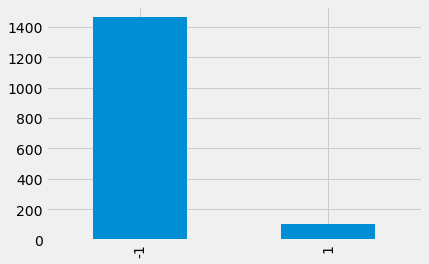

In [12]:
#The bar plot below also shows us that the classes are not balanced
df["Pass/Fail"].value_counts().plot(kind="bar");

In [13]:
unique_vals = df['Pass/Fail'].unique()  # [0, 1, 2]
targets = [df.loc[df['Pass/Fail'] == val] for val in unique_vals]

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\seabo

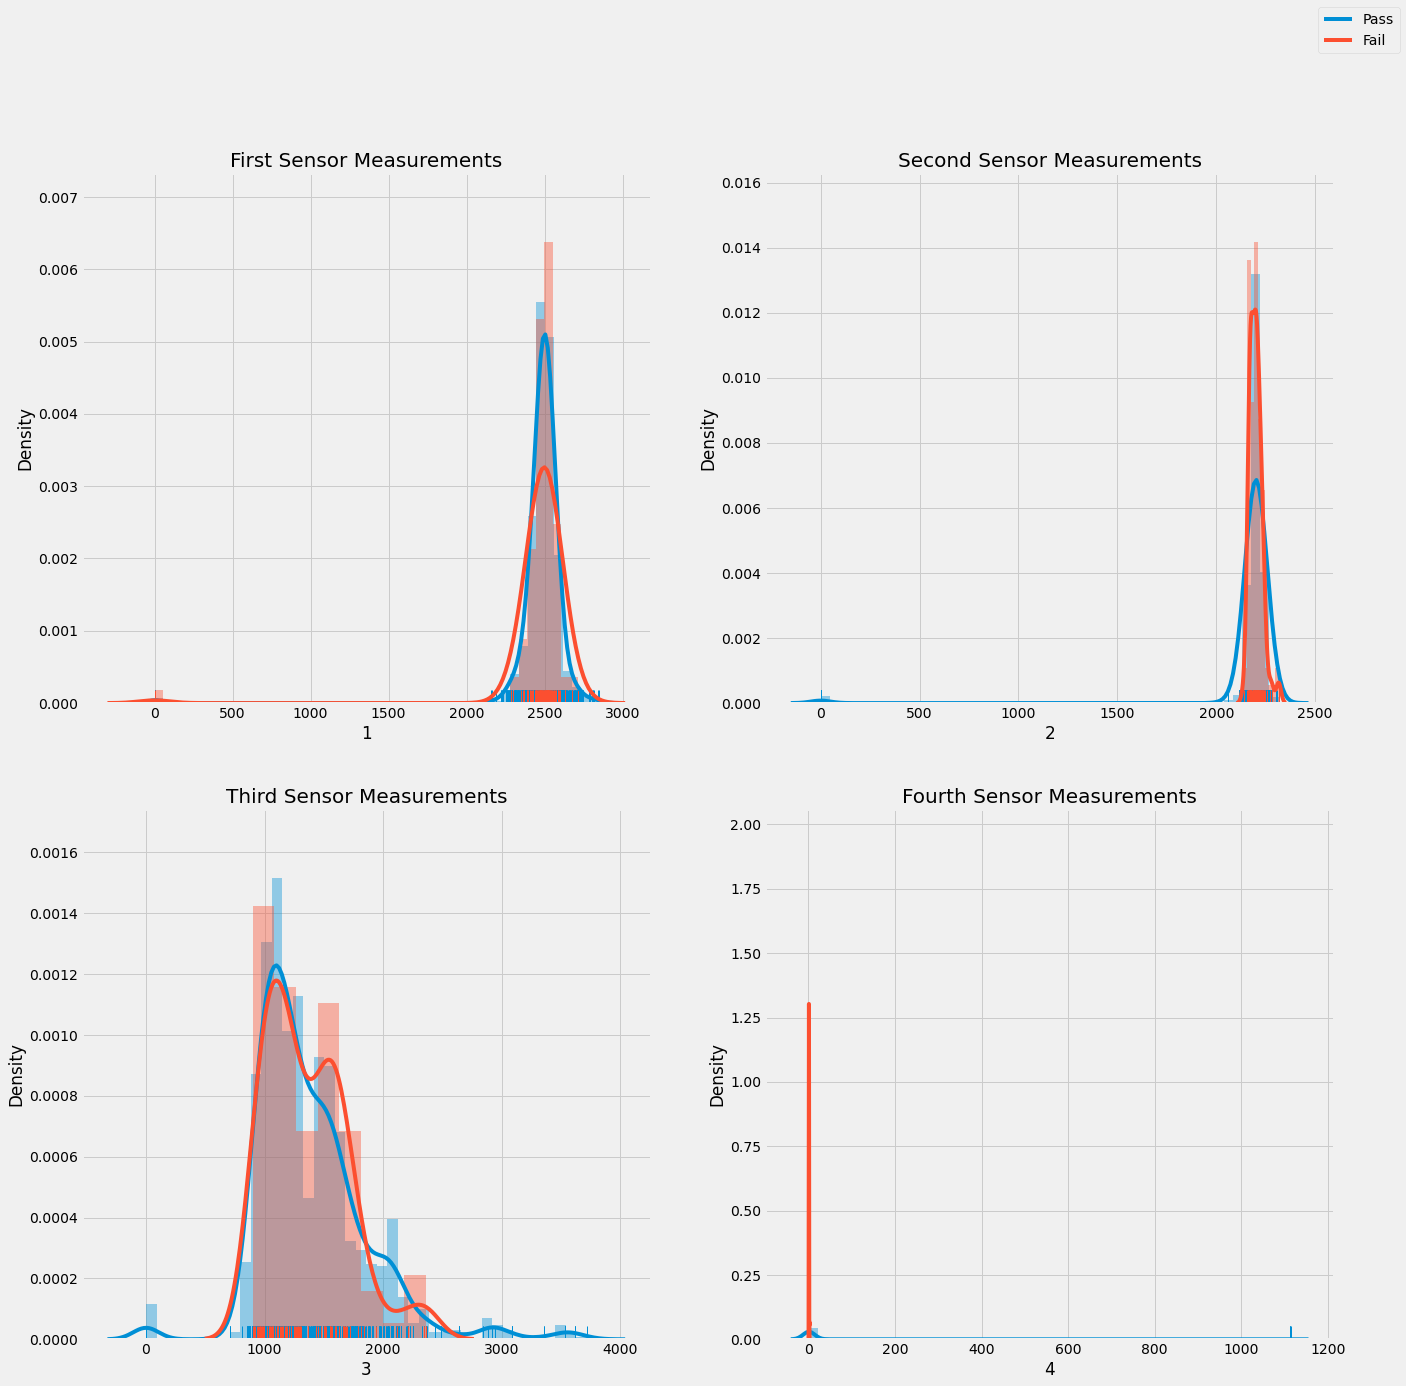

In [14]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 20)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()


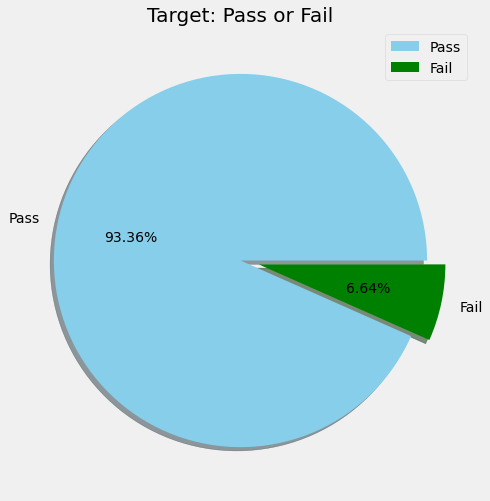

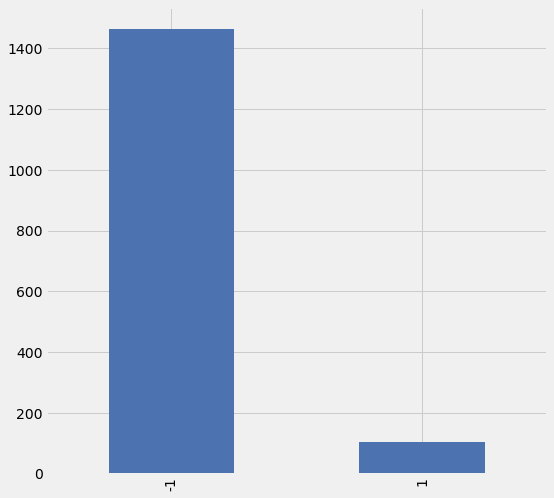

In [15]:
# pie chart
# We have highly imbalanced class with only 6.6% failures and 93.4% pass

labels = ['Pass', 'Fail']
size = df['Pass/Fail'].value_counts()
colors = ['skyblue', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()
df['Pass/Fail'].value_counts().plot(kind="bar");

Text(0.5, 1.0, 'Correlation heatmap for the Data')

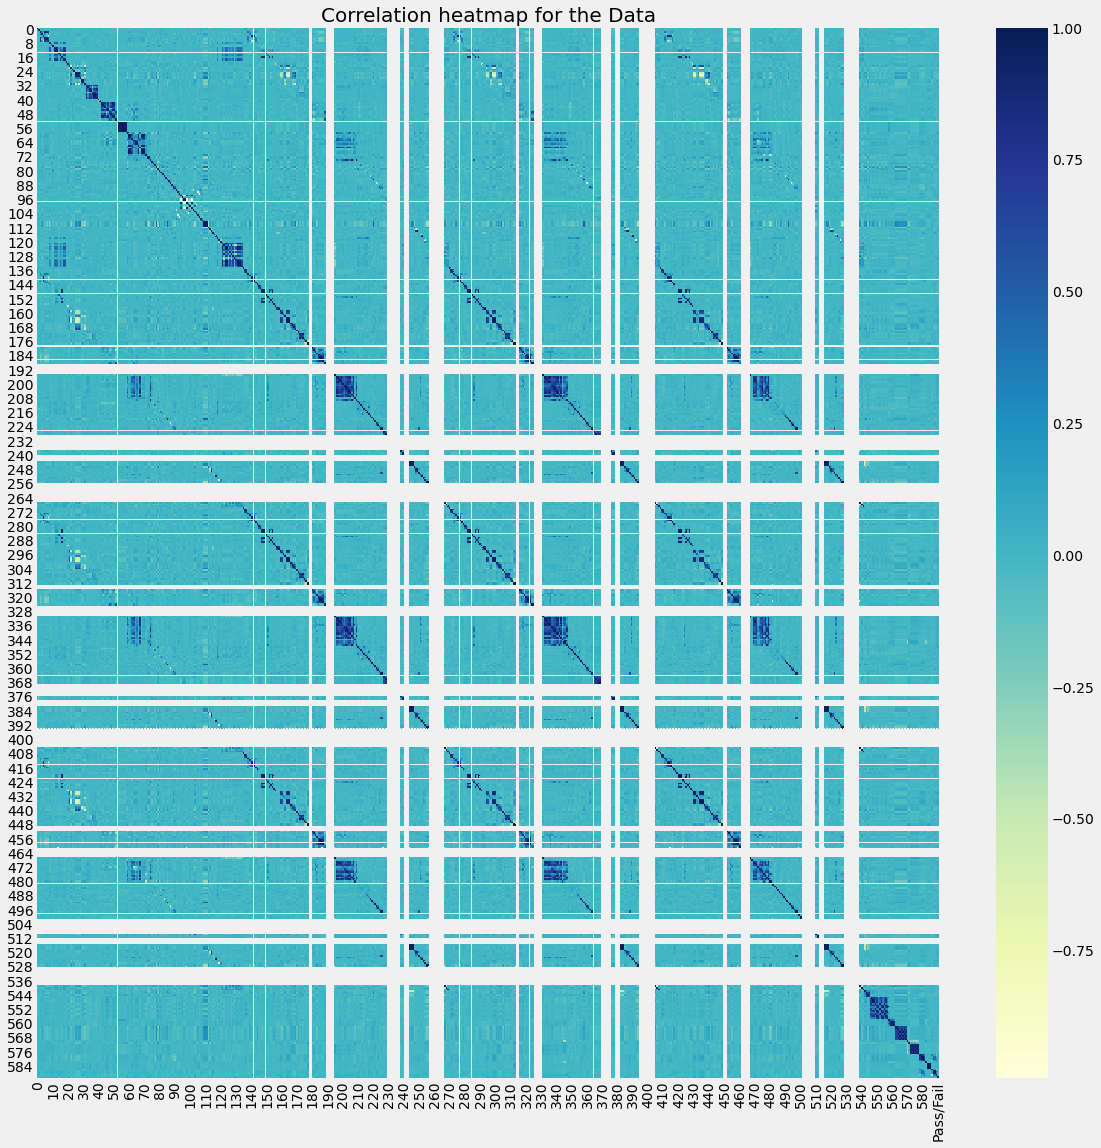

In [16]:
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(df.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

In [17]:
df.shape

(1567, 592)

In [18]:
# deleting the first column

df = df.drop(columns = ['Time'], axis = 1)

# checking the shape of the data after deleting the column
df.shape

(1567, 591)

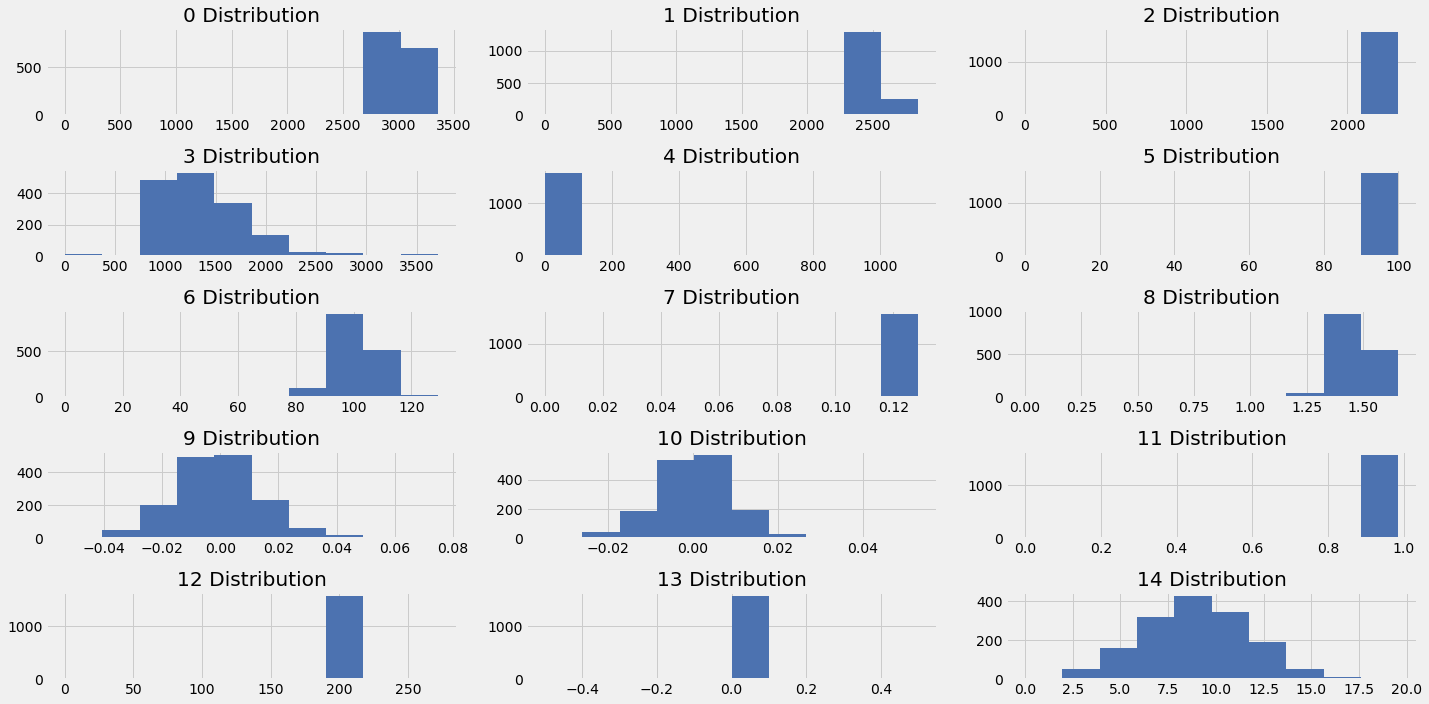

In [19]:
#Observation is that most of the variables distribution are right skewed with long tails and outliers 
#

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

#Most the variables are approximately normally distributed 
draw_histograms(df, df.iloc[:,0:15], 5, 3)

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


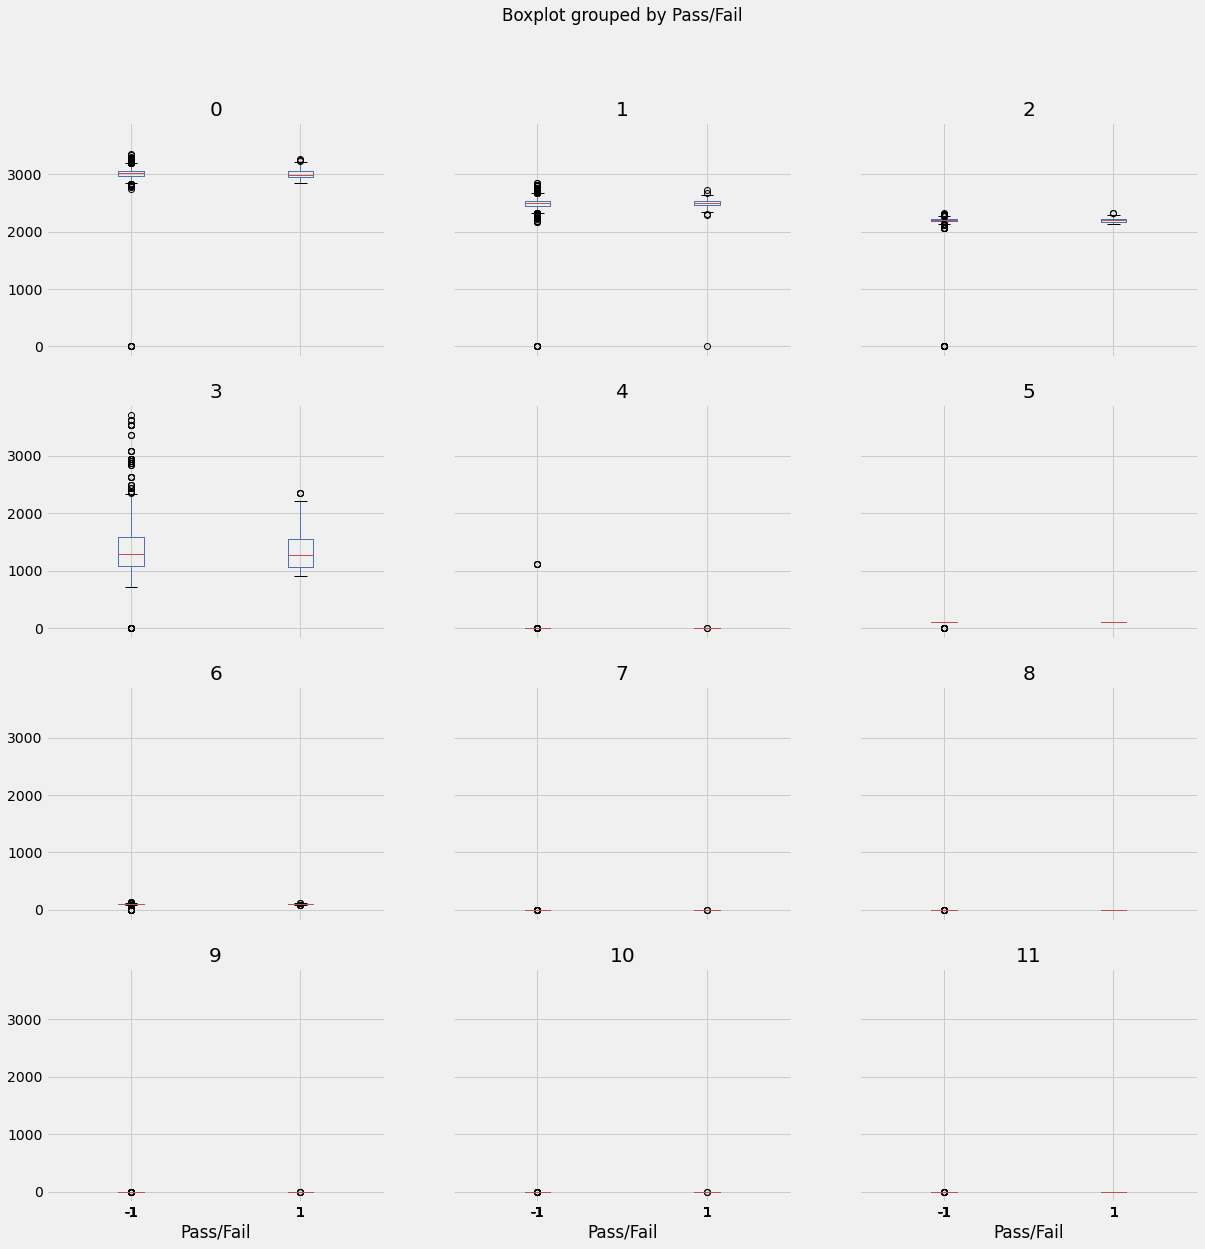

In [21]:
# Create a boxplot for all the features by target (Pass_Fail) column
# One common observation is that almost all have outliers, so outlier removal/correction 
# will be required in future steps
# we see certain features with very less observations like feature 4, 8, 9, 10, 11
df.boxplot(column = ['0','1','2','3','4','5','6','7','8','9','10','11'], by='Pass/Fail', figsize = (20,20));

In [22]:
df.shape

(1567, 591)

In [23]:
#Drop columns with very low standard deviation thresholds 
threshold = 0.001
df=df.drop(df.std()[df.std() < threshold].index.values, axis=1)

In [24]:
df.shape

(1567, 468)

In [25]:
#Since the correlation is very big to view here so have exported as csv file
df.corr().to_csv("correlation.csv")

In [26]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.047782,0.007590,0.009448,-0.000915,0.008706,0.006129,0.010738,-0.050979,0.009959,...,-0.033622,0.010503,0.019840,0.017889,0.019522,0.044745,0.005233,0.003918,0.021489,0.006149
1,-0.047782,1.000000,-0.030448,0.006021,0.002192,-0.030127,-0.031616,-0.025086,0.027609,0.003704,...,0.043107,-0.017392,0.003809,0.004409,0.003821,-0.009219,0.039479,0.040500,0.044464,-0.019672
2,0.007590,-0.030448,1.000000,0.323782,0.020438,0.990089,0.818770,0.747230,0.002600,-0.045731,...,0.038416,-0.010627,-0.004771,-0.003030,-0.004263,0.015733,-0.007090,-0.009122,-0.030434,0.024929
3,0.009448,0.006021,0.323782,1.000000,-0.054015,0.286397,-0.119180,0.279646,-0.108217,0.051567,...,0.000922,0.009788,0.022593,0.022361,0.023288,0.038755,-0.038371,-0.033648,-0.084449,-0.016341
4,-0.000915,0.002192,0.020438,-0.054015,1.000000,0.007041,-0.034736,-0.475861,-0.020082,0.053859,...,0.107783,0.012778,-0.001323,-0.001605,-0.001636,-0.043693,-0.030930,-0.026046,0.050741,-0.013577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.044745,-0.009219,0.015733,0.038755,-0.043693,0.019435,-0.005877,0.051943,0.017642,0.032423,...,-0.206109,-0.008240,0.002391,0.001602,0.002872,1.000000,0.169634,0.165942,-0.484741,0.004448
587,0.005233,0.039479,-0.007090,-0.038371,-0.030930,-0.003077,0.016362,-0.006335,0.027655,0.057856,...,0.227096,0.018981,-0.001809,-0.001696,-0.002122,0.169634,1.000000,0.974332,0.391503,0.035670
588,0.003918,0.040500,-0.009122,-0.033648,-0.026046,-0.004919,0.013832,-0.014288,0.033729,0.059321,...,0.216292,0.019083,-0.001445,-0.001182,-0.001746,0.165942,0.974332,1.000000,0.389898,0.031447
589,0.021489,0.044464,-0.030434,-0.084449,0.050741,-0.026117,0.002246,-0.067263,-0.016895,0.004106,...,0.431632,0.028502,-0.002453,-0.002750,-0.003266,-0.484741,0.391503,0.389898,1.000000,-0.002472


In [27]:
#Create a copy of the dataset for maintain data after outlier removal
#Here after identifying outliers we replace with median
pd_data = df.copy()
#pd_data.head()

#pd_data2 = pd_data.drop(columns=['name'],axis=1)
#pd_data2 = pd_data2.apply(replace,axis=1)
from scipy import stats

#Define a function to remove outliers on max side
def outlier_removal_max(var):
    var = np.where(var > var.quantile(0.75)+ stats.iqr(var),var.quantile(0.50),var)
    return var

#Define a function to remove outliers on min side
def outlier_removal_min(var):
    var = np.where(var < var.quantile(0.25) - stats.iqr(var),var.quantile(0.50),var)
    return var

#Loop over the columns and remove the outliers on min and max side
for column in pd_data:
    pd_data[column] = outlier_removal_max(pd_data[column])
    pd_data[column] = outlier_removal_min(pd_data[column])

In [28]:
pd_data2 = pd_data.copy()

In [29]:
pd_data2["Pass/Fail"] = df["Pass/Fail"]

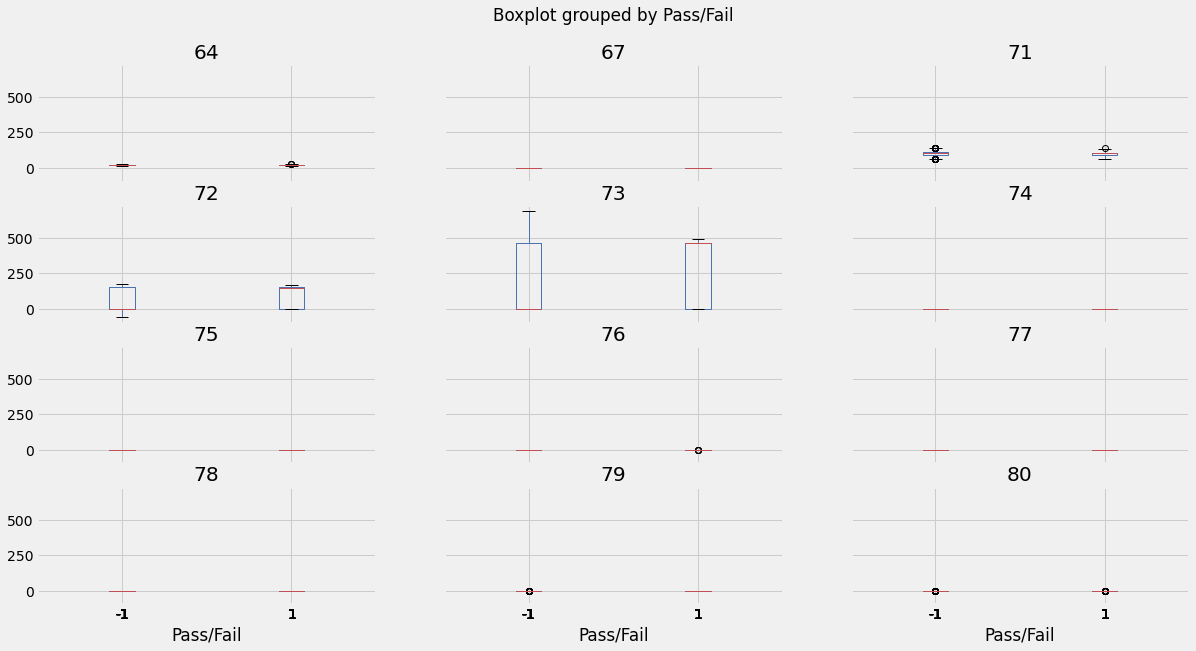

In [30]:
#Plotting sample boxplot to check if outliers are removed or not
#They are removed from the boxplots so we can now go for PCA
pd_data2.boxplot(column = ['64','67','71','72','73','74','75','76','77','78','79','80'], by='Pass/Fail', figsize = (20,10));

In [31]:
df.shape

(1567, 468)

# 4. Data pre-processing:
    • Segregate predictors vs target attributes
    • Check for target balancing and fix it if found imbalanced.
    • Perform train-test split and standardise the data or vice versa if required.
    • Check if the train and test data have similar statistical characteristics when compared with original data.

In [32]:
#Remove the highly collinear features from data
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [33]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
df = remove_collinear_features(df,0.70)

5 | 2 | 0.99
6 | 2 | 0.82
6 | 5 | 0.84
7 | 2 | 0.75
7 | 5 | 0.77
12 | 11 | 0.83
17 | 11 | 0.81
18 | 11 | 0.72
18 | 12 | 0.79
18 | 17 | 0.9
22 | 21 | 0.75
26 | 25 | 0.83
27 | 25 | 0.98
27 | 26 | 0.79
30 | 29 | 0.86
34 | 32 | 0.88
35 | 34 | 0.83
37 | 32 | 0.75
37 | 34 | 0.75
38 | 32 | 0.72
38 | 34 | 0.72
38 | 36 | 0.71
38 | 37 | 0.97
39 | 32 | 0.81
39 | 34 | 0.91
39 | 35 | 0.71
39 | 37 | 0.86
39 | 38 | 0.84
43 | 42 | 0.82
44 | 42 | 0.82
46 | 42 | 0.84
46 | 43 | 0.84
46 | 45 | 0.74
48 | 44 | 0.77
49 | 42 | 1.0
49 | 43 | 0.82
49 | 44 | 0.82
49 | 46 | 0.84
50 | 42 | 0.88
50 | 43 | 0.9
50 | 46 | 0.97
50 | 49 | 0.88
51 | 47 | 0.71
54 | 53 | 1.0
55 | 53 | 0.95
55 | 54 | 0.95
56 | 53 | 0.98
56 | 54 | 0.97
56 | 55 | 0.96
57 | 53 | 0.97
57 | 54 | 0.96
57 | 55 | 0.98
57 | 56 | 0.99
58 | 53 | 0.93
58 | 54 | 0.93
58 | 55 | 0.92
58 | 56 | 0.96
58 | 57 | 0.94
61 | 60 | 0.88
65 | 64 | 0.85
66 | 60 | 0.97
66 | 61 | 0.84
66 | 62 | 0.75
68 | 60 | 0.85
68 | 61 | 0.87
68 | 66 | 0.85
69 | 60 | 0.96
69 | 61 |

426 | 153 | 1.0
426 | 288 | 0.99
427 | 16 | 0.89
427 | 147 | 0.82
427 | 148 | 0.95
427 | 152 | 0.91
427 | 154 | 1.0
427 | 282 | 0.82
427 | 283 | 0.95
427 | 287 | 0.91
427 | 289 | 0.99
427 | 420 | 0.83
427 | 421 | 0.97
427 | 425 | 0.88
428 | 155 | 1.0
428 | 290 | 0.96
429 | 156 | 1.0
429 | 291 | 0.99
430 | 159 | 0.87
430 | 163 | 0.83
430 | 164 | 0.88
430 | 165 | 0.85
430 | 294 | 0.89
430 | 298 | 0.84
430 | 299 | 0.87
430 | 300 | 0.85
431 | 160 | 0.81
431 | 163 | 0.81
431 | 164 | 0.85
431 | 165 | 0.81
431 | 294 | 0.72
431 | 295 | 0.83
431 | 298 | 0.83
431 | 299 | 0.85
431 | 300 | 0.82
431 | 430 | 0.9
434 | 26 | 0.77
434 | 159 | 0.71
434 | 163 | 0.88
434 | 164 | 0.9
434 | 165 | 0.86
434 | 294 | 0.75
434 | 298 | 0.89
434 | 299 | 0.89
434 | 300 | 0.86
434 | 430 | 0.95
434 | 431 | 0.93
435 | 26 | 0.77
435 | 159 | 0.71
435 | 163 | 0.84
435 | 164 | 0.91
435 | 165 | 0.87
435 | 294 | 0.75
435 | 298 | 0.86
435 | 299 | 0.9
435 | 300 | 0.86
435 | 430 | 0.95
435 | 431 | 0.93
435 | 434 | 0.99
436 | 2

In [34]:
df.shape

(1567, 192)

In [35]:
df.head()

,0,1,2,3,4,8,9,10,11,14,...,570,571,572,578,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,1.5005,0.0162,-0.0034,0.9455,7.9558,...,533.8500,2.1113,8.95,0.0000,0.5005,0.0118,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,1.4966,-0.0005,-0.0148,0.9627,10.1548,...,535.0164,2.4335,5.92,0.0096,0.5019,0.0223,0.0096,0.0201,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,1.4436,0.0041,0.0013,0.9615,9.5157,...,535.0245,2.0293,11.21,0.0584,0.4958,0.0157,0.0584,0.0484,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,1.4882,-0.0124,-0.0033,0.9629,9.6052,...,530.5682,2.0253,9.33,0.0202,0.4990,0.0103,0.0202,0.0149,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,1.5031,-0.0031,-0.0072,0.9569,10.5661,...,532.0155,2.0275,8.83,0.0000,0.4800,0.4766,0.0202,0.0149,73.8432,-1


In [36]:
data = df.copy()

In [37]:
#Drop columns with very low standard deviation thresholds 
threshold = 0.2
df = df.drop(df.std()[df.std() < threshold].index.values, axis=1)

In [38]:
df.shape

(1567, 109)

In [39]:
# separating the dependent and independent data

x = df.iloc[:,:108]
y = df["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 108)
shape of y: (1567,)


In [40]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 108)
shape of x_test:  (471, 108)
shape of y_train:  (1096,)
shape of y_test:  (471,)


In [41]:
# standardization

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# 5. Model training, testing and tuning:
    • Model training:
        - Pick up a supervised learning model.
        - Train the model.
        - Use cross validation techniques.
        - Apply hyper-parameter tuning techniques to get the best accuracy.
        - Use any other technique/method which can enhance the model performance.
        - Display and explain the classification report in detail.
        - Design a method of your own to check if the achieved train and test accuracies might change if a different sample 
          population can lead to new train and test accuracies.
        - Apply the above steps for all possible models that you have learnt so far.
    • Display and compare all the models designed with their train and test accuracies.
    • Select the final best trained model along with your detailed comments for selecting this model.
    • Pickle the selected model for future use.
    • Import the future data file. Use the same to perform the prediction using the best chosen model from above. 
      Display the prediction results.

### XGBoost Algorithm (Normal data)

In [42]:
model = XGBClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

[00:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\enaysep\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:>

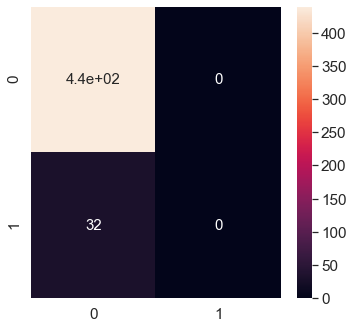

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [44]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  93.20594479830149


 **In the failure class we have no observation classified correctly for Random Forest but still has 93.2% accuracy as we predicted correctly on the observations that passed**

### Random Forest Classifier (Normal Data)

In [45]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

<AxesSubplot:>

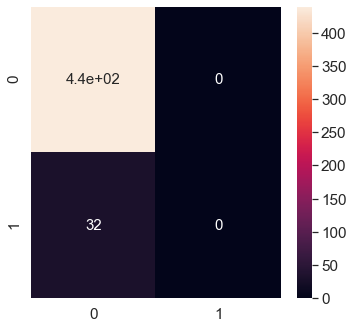

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [47]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  93.20594479830149


**In the failure class we have no observation classified correctly for Random Forest but still has 93.2% accuracy as we predicted correctly on the observations that passed**

### Logistic Regression (Normal Data)

In [48]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train) 
y_pred = lr.predict(x_test)

<AxesSubplot:>

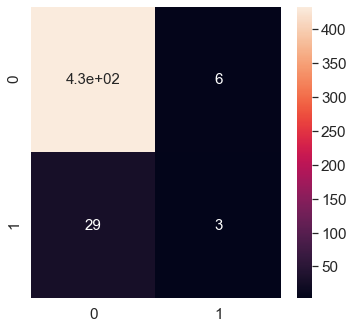

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [50]:
print("Accuracy: ", lr.score(x_test,y_test)*100)

Accuracy:  92.56900212314225


**In the failure class we have 3 observation classified correctly for logistic regression and 92.5% accuracy as we predicted correctly on the observations that passed. So even though this model has lesser accuracy it is preferable over previous models as at least it is classifying more observations in the failure class correctly**

### Lasso (Normal Data)

In [51]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train,y_train)
#print ("Lasso model:", (lasso.coef_))

y_pred = lasso.predict(x_test)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

In [52]:
print("Accuracy: ", lasso.score(x_test,y_test)*100)

Accuracy:  -0.007974076019068299


<AxesSubplot:>

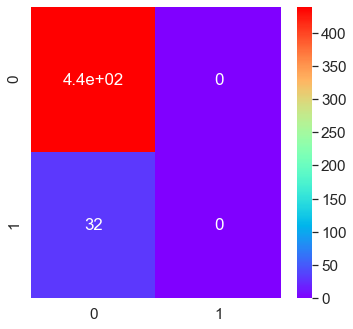

In [53]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot = True, cmap = 'rainbow')
#plt.rcParams['figure.figsize'] = (5, 5)
#sns.set(style = 'dark', font_scale = 1.4)
#sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

## UnderSampling of the Dataset

In [54]:
# Under Sampling - Check how many failure observations are there
# We have 104 such observations

failed_tests = np.array(df[df['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [55]:
# Check how many pass observations are there
# We have 1,463 such observations

normal_indices = data[data['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [56]:
# Get 104 random observations from the pass class as well

random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [57]:
#Getting a 50-50 representation from both pass and fail classes
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [58]:
# creating the undersample data

undersample_data = df.iloc[under_sample, :]

In [59]:
# splitting the undersample dataset into x and y sets

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 108)
(208, 1)


In [60]:
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(145, 108)
(145, 1)
(63, 108)
(63, 1)


In [61]:
# standardization

sc = StandardScaler()
x_train_us = sc.fit_transform(x_train_us)
x_test_us = sc.transform(x_test_us)

### Xg-Boost Classifier (Undersampling)

In [62]:
model = XGBClassifier(random_state=1)

model.fit(x_train_us, y_train_us)

y_pred = model.predict(x_test_us)

[00:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\enaysep\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Confusion Matrix after UnderSampling with XgBoost

<AxesSubplot:>

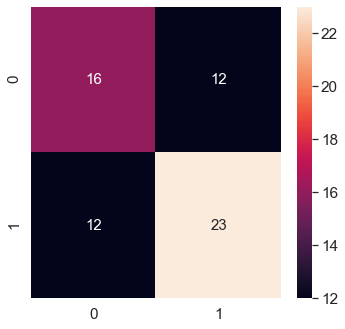

In [63]:
cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

# It is able to predict 26 defected semiconductors among 35 Semi-Conductors

In [64]:
print("Accuracy: ", model.score(x_test_us,y_test_us)*100)

Accuracy:  61.904761904761905


### Grid Search - XG Boost (Undersampling)

In [65]:
# Applying Grid Search CV to find the best model with the best parameters



parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy',  n_jobs = -1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

[00:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\enaysep\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)

Best Accuracy:  66.20689655172414
Best Parameter:  {'cv': 2, 'max_depth': 3, 'random_state': 1}


In [67]:
weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)

model.fit(x_train_us, y_train_us)

y_pred = model.predict(x_test_us)

[00:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv", "scale_pos_weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\enaysep\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
print("Accuracy: ", model.score(x_test_us,y_test_us)*100)

Accuracy:  74.60317460317461


### Confusion matrix XG Boost - Grid Search (Undersample)

<AxesSubplot:>

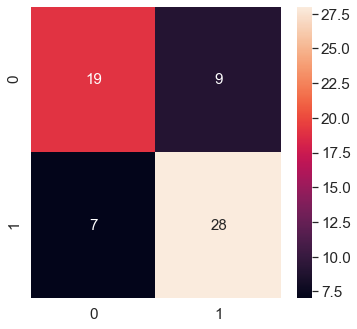

In [69]:
cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

**Most Important Features of the Model**

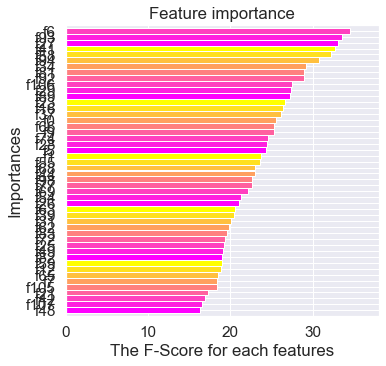

In [70]:
# plotting the feature importances

colors = plt.cm.spring(np.linspace(0, 1, 9))
xgb.plot_importance(model, height = 1, color = colors, grid = True, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (100, 100)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

### Over-Sampling with SMOTE

In [71]:
x_resample, y_resample  = SMOTE(random_state=1).fit_resample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(220, 108)
(220,)


In [72]:
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_os.shape)
print(y_train_os.shape)
print(x_test_os.shape)
print(y_test_os.shape)

(145, 108)
(145, 1)
(63, 108)
(63, 1)


In [73]:
# standardization

sc = StandardScaler()
x_train_os = sc.fit_transform(x_train_os)
x_test_os = sc.transform(x_test_os)

### Xg-Boost Classifier - Grid Search (Oversampling)

In [74]:
model = XGBClassifier(random_state=1)

model.fit(x_train_os, y_train_os)

y_pred = model.predict(x_test_os)

[00:05:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\enaysep\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

# making a parameters list
parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]

# making a grid search model
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
grid_search = grid_search.fit(x_train_os, y_train_os)

# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

[00:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\enaysep\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.6620689655172414
Best Parameter:  {'cv': 2, 'max_depth': 3, 'random_state': 1}


In [77]:
weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)

model.fit(x_train_os, y_train_os)

y_pred = model.predict(x_test_os)

[00:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv", "scale_pos_weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\enaysep\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Confusion Matrix after OverSampling with XgBoost

<AxesSubplot:>

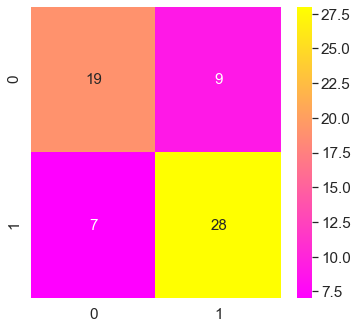

In [78]:
cm = confusion_matrix(y_test_os, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15}, cmap = 'spring')

In [79]:
print("Accuracy: ", model.score(x_test_os,y_test_os)*100)

Accuracy:  74.60317460317461


#### Random Forest (Oversampling)

In [80]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_os, y_train_os)
#scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test_os)
print("Accuracy: ", model.score(x_test_os,y_test_os)*100)

<ipython-input-80-43cc82549071>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_os, y_train_os)


Accuracy:  65.07936507936508


#### Random Forest - (Oversampled) - Confusion Matrix

<AxesSubplot:>

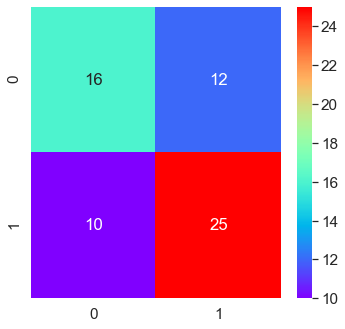

In [81]:
# printing the confusion matrix
cm = confusion_matrix(y_test_os, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

#### Logistic regression - (Oversampled)

In [82]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train_os, y_train_os) 
y_pred = lr.predict(x_test_os)

print("Accuracy: ", lr.score(x_test_os,y_test_os)*100)

Accuracy:  57.14285714285714


C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Logistic regression (Oversampled) - Confusion matrix

<AxesSubplot:>

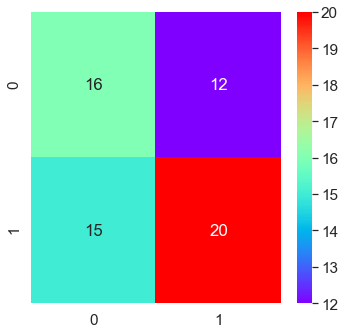

In [83]:
cm = confusion_matrix(y_test_os, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

#### Random Forest - (Undersampled)

In [84]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_us, y_train_us)
#scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test_us)

<ipython-input-84-e05e1404e2e8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_us, y_train_us)


#### Confusion Matrix for Random Forest (Undersampled)

<AxesSubplot:>

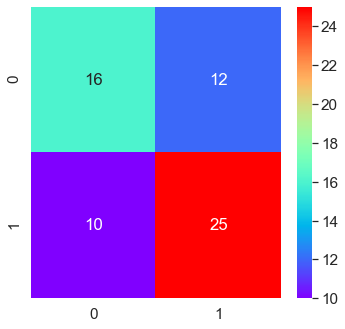

In [85]:
# evaluating the model

# printing the confusion matrix
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

In [86]:
print("Accuracy: ", model.score(x_test_us,y_test_us)*100)

Accuracy:  65.07936507936508


#### Using Lasso (Undersampled)

In [87]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train_us,y_train_us)
#print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.1, random_state=1)

In [88]:
y_pred = lasso.predict(x_test_us)

In [89]:
print(y_pred)

[ 0.13097665 -0.50960717  0.08963302 -0.25985297 -0.20781561 -0.01227511
  0.00315654  0.24699729  0.12497767 -0.05756226  0.74454795 -0.33426524
  0.21432614 -0.05767715 -0.19110794  0.06596927  0.00249743  0.31802417
  0.38400587 -0.08320328 -0.21386072  0.19397942 -0.10808557  0.77018767
  0.01646239 -0.1415014   0.12759016 -0.34445082 -0.2594952  -0.00483132
  0.26847112  0.3230763  -0.17996131  0.21691537  0.1618066   0.3798417
 -0.20578652  0.35786519  0.1732962   0.03330094 -0.23170253 -0.13275024
  0.27499364 -0.01097182  0.13466601 -0.11448409  0.22477556  0.51881337
  0.00577403 -0.20209472 -0.10486036 -0.25690735 -0.31278592  0.13466601
 -0.06642215 -0.31021977 -0.0731327   0.05833543  0.25893921 -0.08696132
 -0.37979532  0.29118206  0.252595  ]


In [90]:
print(y_test_us)

      Pass/Fail
45            1
961          -1
649          -1
104          -1
495           1
...         ...
1302          1
273           1
816          -1
26           -1
441           1

[63 rows x 1 columns]


In [91]:
#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

#### Confusion matrix for Lasso (Undersampled)

<AxesSubplot:>

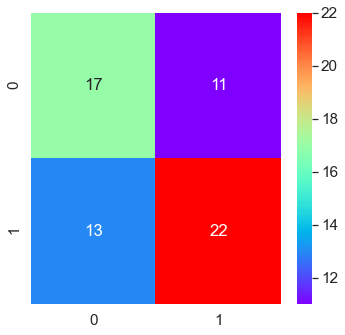

In [92]:
cm = confusion_matrix(y_test_us, y_pred2)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

In [93]:
print("Accuracy: ", lasso.score(x_test_us,y_test_us)*100)

Accuracy:  9.7924441719751


#### Logistic Regression (Undersampled)

In [94]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train_us, y_train_us) 

C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=1)

In [95]:
y_pred = lr.predict(x_test_us)

#### Confusion matrix for Logistic Regression (Undersampled)

<AxesSubplot:>

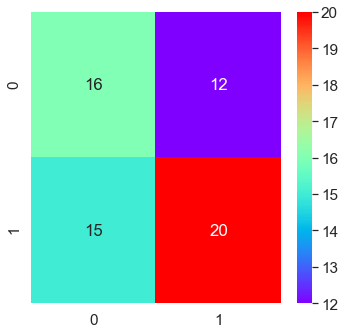

In [96]:
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

In [97]:
print("Accuracy: ", lr.score(x_test_us,y_test_us)*100)

Accuracy:  57.14285714285714


**Local Outlier Factor Classifier, Succesfully detected 9 defected items out of 10, that makes an impeccable accuracy of 88% Recall Accuracy. This algorithm would have been worked even better if the data was a little bigger with more instances of defected items.**

## One Class SVM (Undersampled)

    In one-class SVM, the support vector model is trained on data that has only one class, which is the “normal” class. It infers the properties of normal cases and from these properties can predict which examples are unlike the normal examples. This is useful for anomaly detection because the scarcity of training examples is what defines anomalies: that is, typically there are very few examples of the network intrusion, fraud, or other anomalous behavior.

In [98]:
model = OneClassSVM(kernel ='rbf', degree=3, gamma=0.1,nu=0.005, max_iter=-1)

model.fit(x_train_us, y_train_us)
y_pred = model.fit_predict(x_test_us)

#### Confusion Matrix for One Class SVM

<AxesSubplot:>

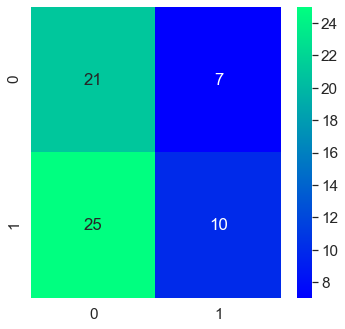

In [99]:
# evaluating the model
# printing the confusion matrix
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm ,annot = True, cmap = 'winter')

#### Confusion matrix for OneClassSVM - (Oversampled)

<AxesSubplot:>

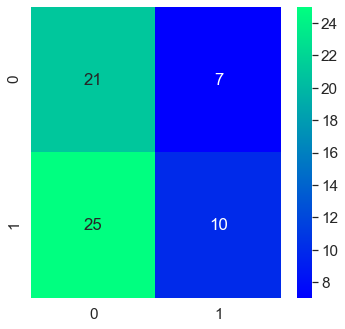

In [100]:
# evaluating the model
# printing the confusion matrix
cm = confusion_matrix(y_test_os, y_pred)
sns.heatmap(cm ,annot = True, cmap = 'winter')

### Using PCA for demensionality reduction

In [101]:
#Scaling the data before applying PCA
from scipy.stats import zscore
data_new=df.iloc[:,:108].apply(zscore)
data_new.head()

,0,1,2,3,4,14,15,16,19,21,...,511,521,546,551,559,562,570,571,572,589
0,0.139998,0.429208,0.032735,0.059342,-0.049911,-0.365993,0.103291,0.063399,0.115613,0.292325,...,-0.836511,-0.112621,0.370338,-0.186148,0.560984,-2.171890,0.190142,0.034410,-0.226018,-1.061159
1,0.464020,-0.105874,0.236852,0.173847,-0.059375,0.413621,0.097826,-0.257726,0.058404,0.258108,...,-0.836511,-0.112621,0.924510,0.229177,-0.749637,-2.171890,0.256816,1.205944,-0.261137,1.156951
2,-0.351256,0.407233,0.026413,0.684661,-0.047236,0.187040,0.176936,-0.235386,0.136649,0.248603,...,-0.095153,-0.112621,-0.138891,-0.133288,0.229853,0.501601,0.257279,-0.263745,-0.199823,-0.178407
3,-0.070903,-0.025985,0.086766,-1.033387,-0.050620,0.218770,0.400773,-0.080439,0.075508,0.217428,...,-0.836511,-0.112621,0.567250,28.924325,2.002170,0.513254,0.002548,-0.278290,-0.221613,-0.274469
4,0.146544,0.098340,0.250931,-0.125070,-0.046823,0.559439,0.332726,0.184487,0.070888,0.205262,...,-0.836511,-0.112621,1.135896,0.720015,-0.545597,-2.171890,0.085279,-0.270290,-0.227409,-0.274469


In [102]:
data_new.isnull().any().any()

False

In [103]:
# separating the dependent and independent data

x = data_new.iloc[:,:108]
y = df["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 108)
shape of y: (1567,)


In [104]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(x.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00063857 -0.04781282  0.00759455 ... -0.01894628  0.01869284
   0.02150242]
 [-0.04781282  1.00063857 -0.03046719 ... -0.02703898  0.01539509
   0.04449214]
 [ 0.00759455 -0.03046719  1.00063857 ...  0.04020447  0.02157626
  -0.03045388]
 ...
 [-0.01894628 -0.02703898  0.04020447 ...  1.00063857 -0.15131396
   0.01093183]
 [ 0.01869284  0.01539509  0.02157626 ... -0.15131396  1.00063857
  -0.02252505]
 [ 0.02150242  0.04449214 -0.03045388 ...  0.01093183 -0.02252505
   1.00063857]]


In [105]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.03426947 -0.00360485  0.00058008 ...  0.01002374 -0.00432486
  -0.00207011]
 [ 0.00553844  0.01582782 -0.01940739 ... -0.05062495 -0.03486912
   0.00278737]
 [-0.03052902 -0.00374962 -0.0387026  ... -0.00627323 -0.08893456
   0.00652495]
 ...
 [-0.11882569  0.03984807  0.01397264 ... -0.0433897   0.07313251
  -0.11995608]
 [ 0.01483787 -0.00598112 -0.05434388 ...  0.04643509 -0.10964466
   0.11799453]
 [-0.02592519 -0.00701462 -0.03268632 ... -0.00188172 -0.02747984
   0.07073143]]

 Eigen Values 
%s [4.77787414 3.4668319  3.09634806 2.82369169 2.34625863 2.23938094
 2.11359271 2.06018645 1.91443995 1.88422761 1.85205442 0.01532482
 0.03050398 1.73763982 1.71603436 1.68385034 1.63839386 1.61361989
 0.09999648 0.11090389 0.16655339 1.58194594 1.54339405 1.53052477
 1.50600047 1.44901276 0.18505072 0.19856469 0.20942583 0.21837308
 0.23790225 1.38580556 1.38520318 1.34696108 0.26010431 0.27672526
 0.29808357 0.29292985 1.31909978 0.32531617 1.28812554 1.26275238
 0

In [106]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  4.42113434   7.62911535  10.49427469  13.10713554  15.27821085
  17.35038849  19.30616987  21.21253258  22.98403093  24.72757276
  26.4413436   28.0492426   29.63714932  31.19527504  32.71133828
  34.20447729  35.6683073   37.09646388  38.51271207  39.90626707
  41.24708935  42.52942379  43.81120082  45.05759109  46.27820033
  47.47014802  48.63861704  49.78798458  50.91244297  52.02371395
  53.10224673  54.17106249  55.22797404  56.27335776  57.28703846
  58.29022012  59.28339343  60.26802059  61.2469804   62.21433893
  63.16063233  64.09466502  65.01777496  65.93366237  66.84472537
  67.74412711  68.63887873  69.52279192  70.39734761  71.26550722
  72.11804026  72.96393248  73.80511008  74.62926016  75.43876565
  76.24142185  77.02544563  77.79878687  78.56526794  79.31891837
  80.06885911  80.8103838   81.54473727  82.27282769  82.97581303
  83.67326517  84.35650263  85.02090309  85.67111995  86.31184379
  86.93958769  87.54965861  88.14855035  88.74

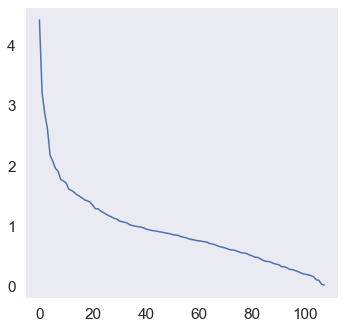

In [107]:
plt.plot(var_exp)

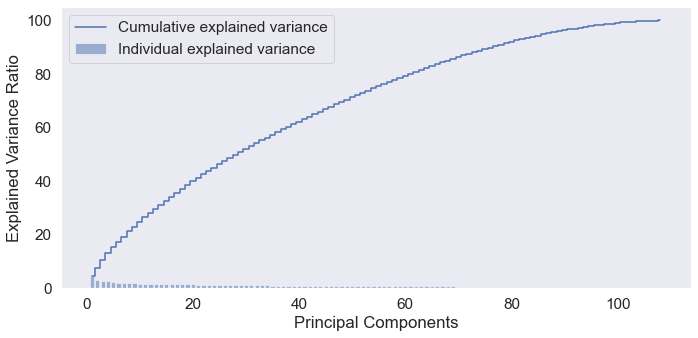

In [108]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [109]:
len(cum_var_exp)

108

In [110]:
# NOTE - we are generating only 80 PCA dimensions (dimensionality reduction from 108 to 80)
# For 80 components we are getting approximately 90% of the variance
pca = PCA(n_components=80)
data_reduced = pca.fit_transform(x)
data_reduced.transpose()

array([[ 1.26230072,  0.90496572,  2.30095529, ..., -1.46456014,
        -2.61410675, -2.63387103],
       [-0.73083108, -1.01787385, -0.16315291, ..., -3.13878109,
        -0.21703067, -1.18842981],
       [-0.36951926,  0.70267157,  0.03521522, ..., 13.85590448,
        -0.94925156, 12.67325363],
       ...,
       [-0.91706904, -1.93410129, -0.94354351, ..., -0.09550119,
         0.02513085,  0.50457418],
       [-0.40550719, -0.98020472, -0.20114102, ...,  0.48108792,
         0.82226816, -0.19146574],
       [-0.79599088, -1.5219933 , -0.37228356, ...,  0.45648842,
         0.70894074,  0.16342284]])

In [111]:
pca.components_

array([[-0.0342694 , -0.0055385 ,  0.03052871, ...,  0.11882568,
        -0.01483788,  0.02592508],
       [ 0.0036055 , -0.01582704,  0.00375103, ..., -0.03984781,
         0.00598226,  0.00701352],
       [-0.00058197,  0.01940802,  0.03869566, ..., -0.01397087,
         0.05434187,  0.03268848],
       ...,
       [-0.06197912, -0.07557485,  0.0554203 , ...,  0.27872573,
         0.26816313,  0.08419244],
       [-0.0224118 , -0.02023823,  0.09839968, ..., -0.24064328,
        -0.14801758, -0.08376642],
       [ 0.00533634, -0.00236575, -0.08197044, ..., -0.01635969,
         0.16107054, -0.04372863]])

In [112]:
df_comp = pd.DataFrame(pca.components_,columns=list(x))
df_comp.head()

,0,1,2,3,4,14,15,16,19,21,...,511,521,546,551,559,562,570,571,572,589
0,-0.034269,-0.005539,0.030529,-0.085940,-0.027012,-0.004289,0.011157,0.027513,-0.054728,-0.071251,...,0.024392,-0.001395,-0.044988,0.001689,-0.010102,-0.199470,-0.041917,0.118826,-0.014838,0.025925
1,0.003606,-0.015827,0.003751,0.021438,0.020051,0.038251,0.046467,0.013782,0.060663,-0.034222,...,0.036229,0.004174,0.037342,0.017029,0.015211,0.030163,-0.007289,-0.039848,0.005982,0.007014
2,-0.000582,0.019408,0.038696,0.017509,0.043097,-0.063434,-0.163889,-0.090538,-0.017311,0.302643,...,-0.016639,0.013646,-0.022332,0.011382,-0.007761,0.048630,-0.029651,-0.013971,0.054342,0.032688
3,0.003929,-0.034561,-0.045177,0.015619,-0.030809,-0.007546,-0.267368,-0.045529,0.006486,-0.269623,...,-0.020531,0.007975,0.014123,-0.006172,0.004777,0.008253,-0.003852,-0.005516,0.022656,0.048140
4,0.024634,0.017105,-0.149611,-0.014712,-0.120266,-0.083348,-0.016168,-0.018043,-0.051034,-0.155421,...,-0.024529,-0.017747,-0.134925,-0.077742,0.033250,0.060314,-0.112398,0.035694,0.080171,-0.013620


<AxesSubplot:>

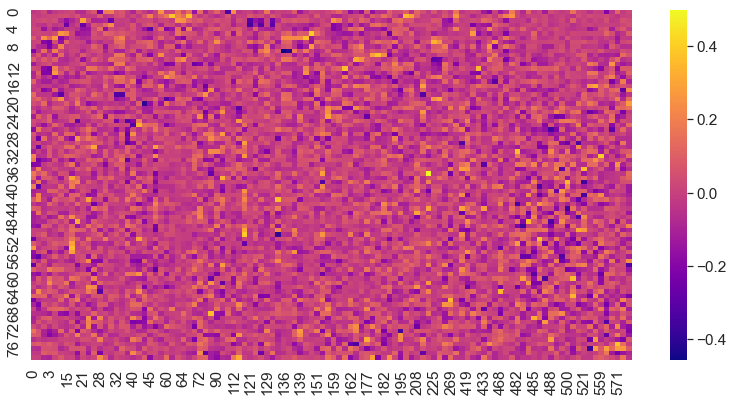

In [113]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [114]:
data_reduced.shape

(1567, 80)

In [115]:
df_red2 = pd.DataFrame(data_reduced)
df_red2.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1.262301,-0.730831,-0.369519,-0.550751,-0.480133,-0.358255,-0.090697,1.713991,0.759403,2.234735,...,-0.782268,-0.372971,0.030341,-0.141524,0.570659,-0.635501,0.633724,-0.917069,-0.405507,-0.795991
1,0.904966,-1.017874,0.702672,0.947903,0.082556,0.366370,-0.513813,1.417124,0.849688,2.086563,...,-0.603293,0.365868,-0.550522,-0.155125,0.529368,0.057428,1.299682,-1.934101,-0.980205,-1.521993
2,2.300955,-0.163153,0.035215,-1.252363,-0.387739,-0.412219,0.018278,0.657665,-0.568397,0.900561,...,0.111709,-0.731411,0.899154,-0.462571,-0.066557,-1.426566,-0.148489,-0.943544,-0.201141,-0.372284
3,3.034983,0.206473,0.041844,-0.488763,-2.490449,1.551094,-0.598325,0.177299,-0.171273,0.760214,...,0.929999,1.706802,-3.592105,2.601190,-0.195305,6.542891,0.489297,8.296330,0.590098,2.035953
4,2.403242,1.693113,1.077683,0.482132,-2.683444,0.912250,-2.198318,1.719532,1.073846,-0.597292,...,-0.486702,1.006191,0.116901,0.072218,-0.159478,1.623304,-0.475785,-1.375645,-0.225188,-0.841174


In [116]:
df_red3 = df_red2.copy()
df_red4 = df_red3
df_red4["Pass/Fail"] = df["Pass/Fail"]

In [117]:
df_red4.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,Pass/Fail
0,1.262301,-0.730831,-0.369519,-0.550751,-0.480133,-0.358255,-0.090697,1.713991,0.759403,2.234735,...,-0.372971,0.030341,-0.141524,0.570659,-0.635501,0.633724,-0.917069,-0.405507,-0.795991,-1
1,0.904966,-1.017874,0.702672,0.947903,0.082556,0.366370,-0.513813,1.417124,0.849688,2.086563,...,0.365868,-0.550522,-0.155125,0.529368,0.057428,1.299682,-1.934101,-0.980205,-1.521993,-1
2,2.300955,-0.163153,0.035215,-1.252363,-0.387739,-0.412219,0.018278,0.657665,-0.568397,0.900561,...,-0.731411,0.899154,-0.462571,-0.066557,-1.426566,-0.148489,-0.943544,-0.201141,-0.372284,1
3,3.034983,0.206473,0.041844,-0.488763,-2.490449,1.551094,-0.598325,0.177299,-0.171273,0.760214,...,1.706802,-3.592105,2.601190,-0.195305,6.542891,0.489297,8.296330,0.590098,2.035953,-1
4,2.403242,1.693113,1.077683,0.482132,-2.683444,0.912250,-2.198318,1.719532,1.073846,-0.597292,...,1.006191,0.116901,0.072218,-0.159478,1.623304,-0.475785,-1.375645,-0.225188,-0.841174,-1


In [118]:
df_red4.shape

(1567, 81)

array([[<AxesSubplot:title={'center':'0'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'1'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'2'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'3'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'4'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'5'}, xlabel='Pass/Fail'>]],
      dtype=object)

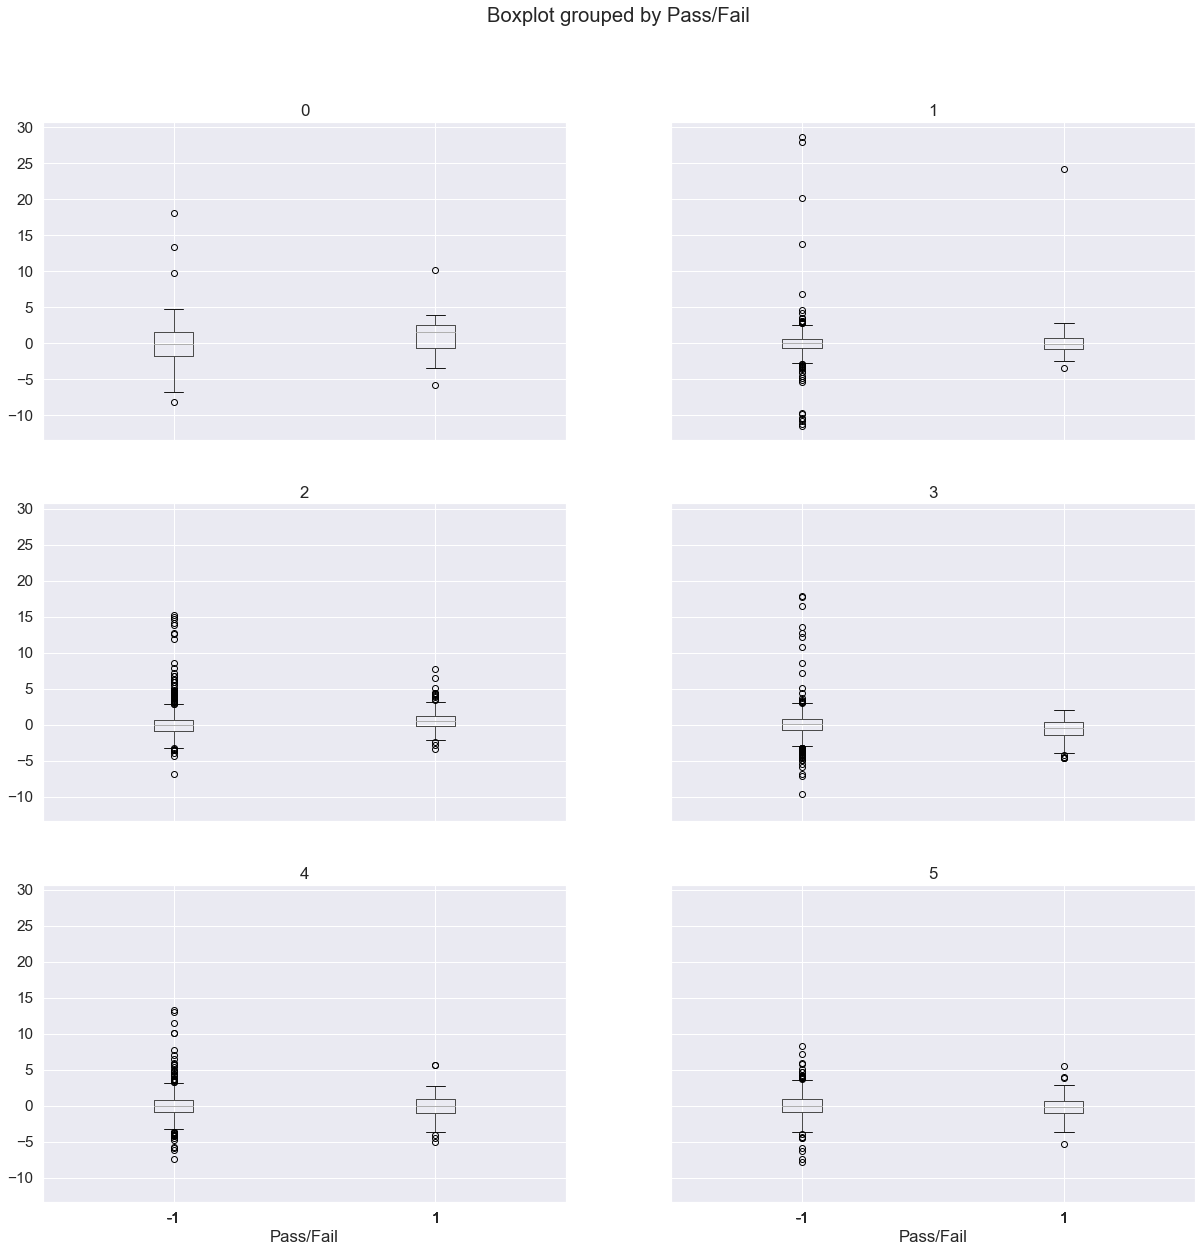

In [119]:
#Sample boxplot shows that there are outliers in the data, let us fix them
df_red4.boxplot(column = [df_red4.columns[0],
                          df_red4.columns[1],
                          df_red4.columns[2],
                          df_red4.columns[3], 
                          df_red4.columns[4],
                          df_red4.columns[5],
                         ]
                          , by = 'Pass/Fail', figsize=(20,20))

In [120]:
#Create a copy of the dataset for maintain data after outlier removal
#Here after identifying outliers we replace with median
pd_data = df_red4.copy()
#pd_data.head()

#pd_data2 = pd_data.drop(columns=['name'],axis=1)
#pd_data2 = pd_data2.apply(replace,axis=1)
from scipy import stats

#Define a function to remove outliers on max side
def outlier_removal_max(var):
    var = np.where(var > var.quantile(0.75)+ stats.iqr(var),var.quantile(0.50),var)
    return var

#Define a function to remove outliers on min side
def outlier_removal_min(var):
    var = np.where(var < var.quantile(0.25) - stats.iqr(var),var.quantile(0.50),var)
    return var

#Loop over the columns and remove the outliers on min and max side
for column in pd_data:
    pd_data[column] = outlier_removal_max(pd_data[column])
    pd_data[column] = outlier_removal_min(pd_data[column])

array([[<AxesSubplot:title={'center':'0'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'1'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'2'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'3'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'4'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'5'}, xlabel='Pass/Fail'>]],
      dtype=object)

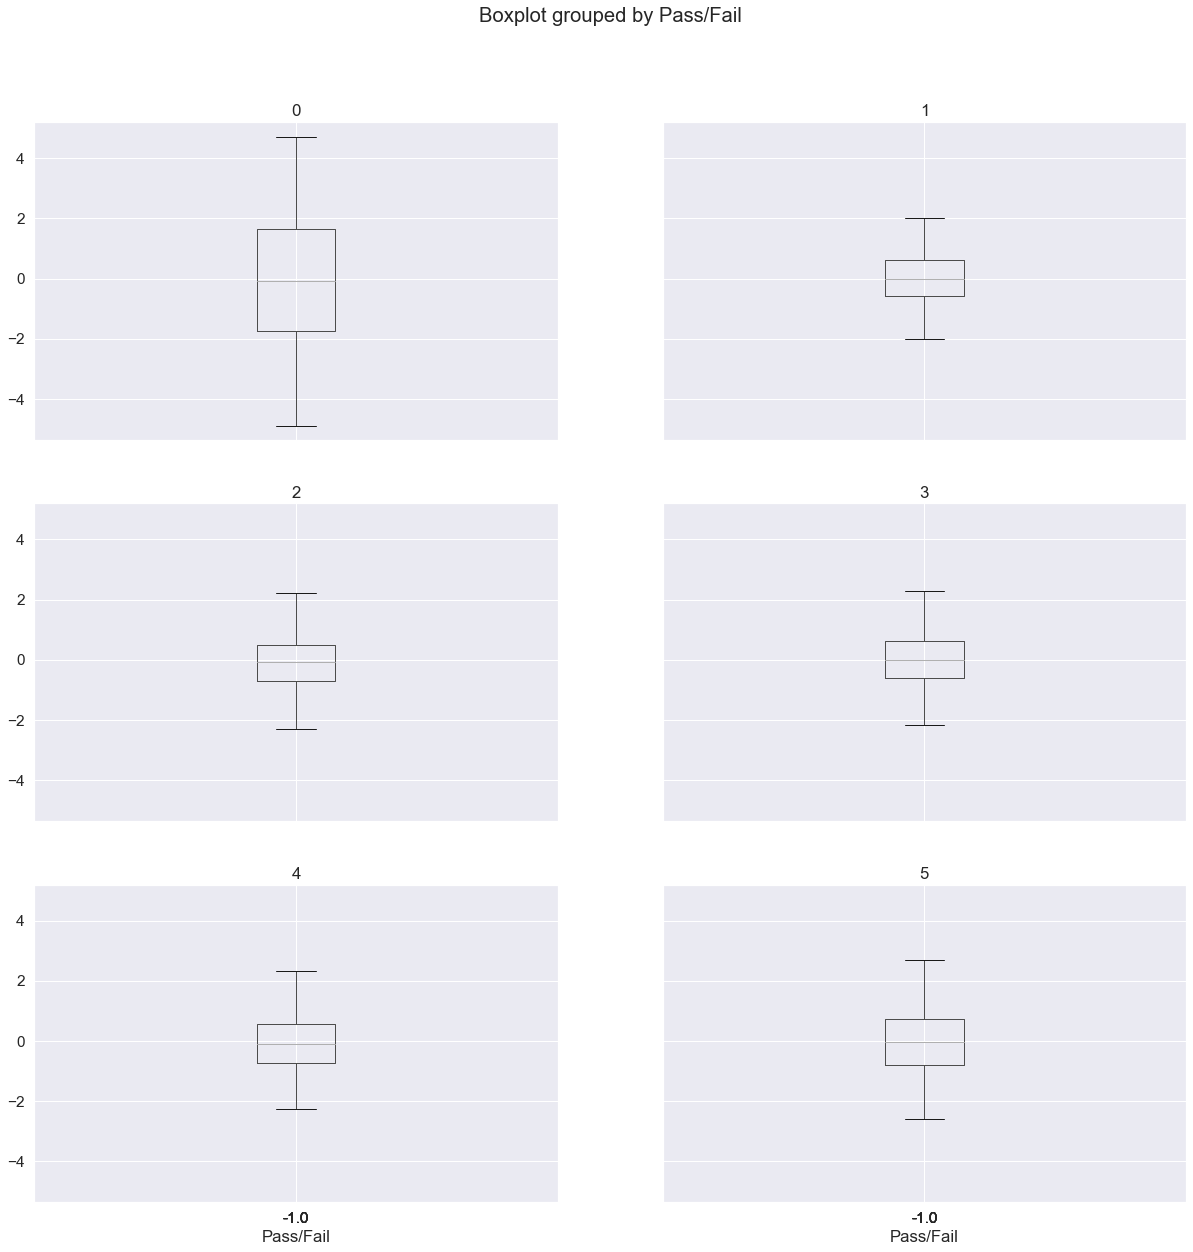

In [121]:
#Sample boxplot shows that outliers are fixed, but we are loosing observations belonging to failure 
#class (Pass/Fail = 1) So we should not remove outliers here 
pd_data.boxplot( column =[df_red4.columns[0],
                          df_red4.columns[1],
                          df_red4.columns[2],
                          df_red4.columns[3], 
                          df_red4.columns[4],
                          df_red4.columns[5],
                         ],by = 'Pass/Fail', figsize=(20,20))

In [122]:
# separating the dependent and independent data

x = df_red4.iloc[:, df_red4.columns != 'Pass/Fail'] 
y = df_red4.iloc[:, df_red4.columns == 'Pass/Fail']

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 80)
shape of y: (1567, 1)


In [123]:
# Under Sampling - Check how many failure observations are there
# We have 104 such observations

failed_tests = np.array(df_red4[df_red4['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [124]:
# Check how many pass observations are there
# We have 1,463 such observations

normal_indices = df_red4[df_red4['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [125]:
# Get 104 random observations from the pass class as well

random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [126]:
#Getting a 50-50 representation from both pass and fail classes
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [127]:
# creating the undersample data

undersample_data = df_red4.iloc[under_sample, :]

# splitting the undersample dataset into x and y sets

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 80)
(208, 1)


In [128]:
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(145, 80)
(145, 1)
(63, 80)
(63, 1)


In [129]:
# standardization - completed before PCA itself

sc = StandardScaler()
x_train_us = sc.fit_transform(x_train_us)
x_test_us = sc.transform(x_test_us)

#### XGBoost - PCA (undersampled)

In [130]:
model = XGBClassifier(random_state=1)

model.fit(x_train_us, y_train_us)

y_pred = model.predict(x_test_us)

cm = confusion_matrix(y_test_us, y_pred)

[00:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\enaysep\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Confusion matrix for XG Boost - PCA - (Undersampled)

<AxesSubplot:>

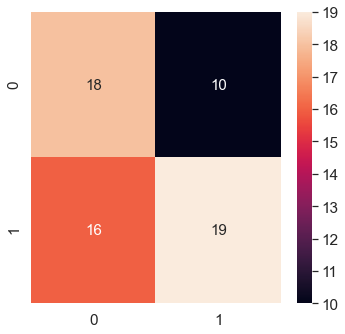

In [131]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [132]:
print("Accuracy: ", model.score(x_test_us,y_test_us)*100)

Accuracy:  58.730158730158735


#### XG Boost - PCA - Grid Search - Undersampled

In [133]:
# Applying Grid Search CV to find the best model with the best parameters

parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
             'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)

[00:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Accuracy:  67.58620689655173
Best Parameter:  {'cv': 2, 'max_depth': 3, 'random_state': 1}


C:\Users\enaysep\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:
weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 2, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)

model.fit(x_train_us, y_train_us)

y_pred = model.predict(x_test_us)

print("Accuracy: ", model.score(x_test_us,y_test_us)*100)

[00:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv", "scale_pos_weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  55.55555555555556


C:\Users\enaysep\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Confusion matrix of XG Boost - Grid Search - PCA - Undersampled

<AxesSubplot:>

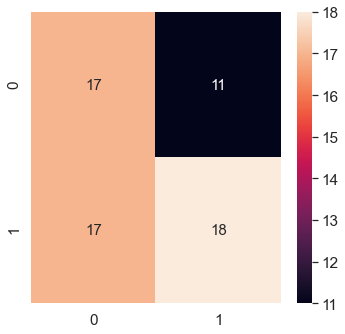

In [135]:
cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

#### Random Forest - PCA - Undersampled

<ipython-input-136-4708779da177>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_us, y_train_us)


<AxesSubplot:>

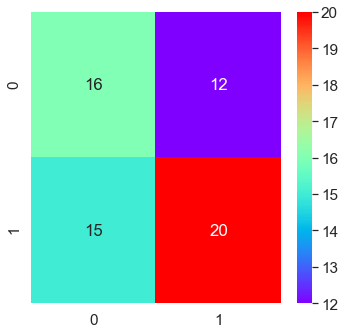

In [136]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_us, y_train_us)
#scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test_us)

# evaluating the model

# printing the confusion matrix
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

In [137]:
print("Accuracy: ", model.score(x_test_us,y_test_us)*100)

Accuracy:  57.14285714285714


#### Logistic Regression - PCA - Undersampled

C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

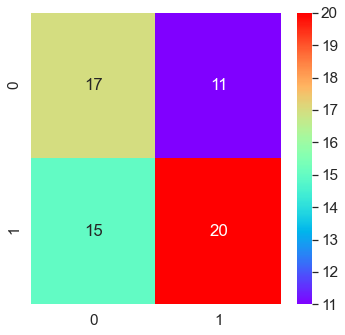

In [138]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train_us, y_train_us) 
y_pred = lr.predict(x_test_us)
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

In [139]:
print("Accuracy: ", lr.score(x_test_us,y_test_us)*100)

Accuracy:  58.730158730158735


#### Lasso - PCA - Undersampled

In [140]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train_us,y_train_us)
#print ("Lasso model:", (lasso.coef_))

y_pred = lasso.predict(x_test_us)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

In [141]:
actual_cost = list(y_test_us)
actual_cost = np.asarray(actual_cost)
y_pred_lass = lasso.predict(x_test_us)

In [142]:
print("Accuracy: ", lasso.score(x_test_us, y_test_us)*100)

Accuracy:  -10.25278975145203


#### Confusion Matrix for Lasso - PCA - Undersampled

<AxesSubplot:>

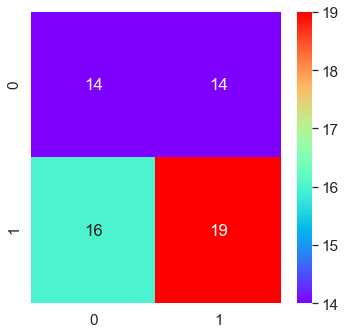

In [143]:
cm = confusion_matrix(y_test_us, y_pred2)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

#### Elliptic Envelop technique

In [144]:
# defining outlier fraction for Elliptic Envelop, Isolation Forest and Local Outlier Factor

Fraud = df[df['Pass/Fail']==1]
Valid = df[df['Pass/Fail']==-1]

outlier_fraction = len(Fraud)/float(len(Valid))
print("Outlier Fraction :", outlier_fraction)

Outlier Fraction : 0.0710868079289132


In [145]:
#from sklearn.covariance import EllipticEnvelope
model = EllipticEnvelope(contamination=outlier_fraction, random_state=1)
model.fit(x_train, y_train)
#scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test)

C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-253.101322163378711 > -342.486397006552238). You may want to try with a higher value of support_fraction (current value: 0.551).
  warnings.warn(
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-254.940524052083049 > -343.360128043888437). You may want to try with a higher value of support_fraction (current value: 0.551).
  warnings.warn(
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-257.971831006046273 > -349.233611437097693). You may want to try with a higher value of support_fraction (current value: 0.551).
  warnings.w

C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-255.562942249485786 > -336.053211520726677). You may want to try with a higher value of support_fraction (current value: 0.551).
  warnings.warn(
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-244.221596351068342 > -293.857920799072588). You may want to try with a higher value of support_fraction (current value: 0.551).
  warnings.warn(
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-258.369748408923783 > -344.451747240037264). You may want to try with a higher value of support_fraction (current value: 0.551).
  warnings.w

C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-261.455822706075480 > -366.120187557394161). You may want to try with a higher value of support_fraction (current value: 0.550).
  warnings.warn(
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-261.399242679845543 > -364.592016092877714). You may want to try with a higher value of support_fraction (current value: 0.550).
  warnings.warn(
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-263.401816972208621 > -368.313222461394048). You may want to try with a higher value of support_fraction (current value: 0.550).
  warnings.w

<AxesSubplot:>

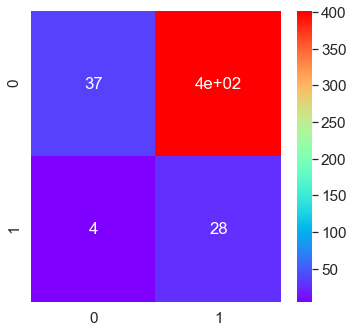

In [146]:
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

#### Isolation Forest technique

In [147]:
# from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, max_samples=len(x_train), 
                                       contamination=outlier_fraction, random_state=1, verbose=0)
model.fit(x_train, y_train)
scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test)

<AxesSubplot:>

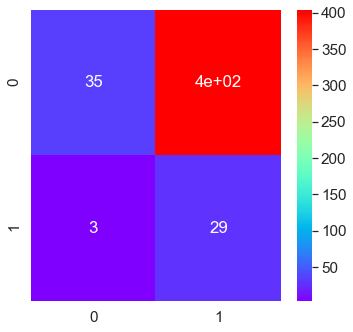

In [148]:
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

#### Local Outlier Factor Technique

In [149]:
from sklearn.neighbors import LocalOutlierFactor


model = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, 
                           metric_params=None, contamination=outlier_fraction)

model.fit(x_train, y_train)
y_pred = model.fit_predict(x_test)

<AxesSubplot:>

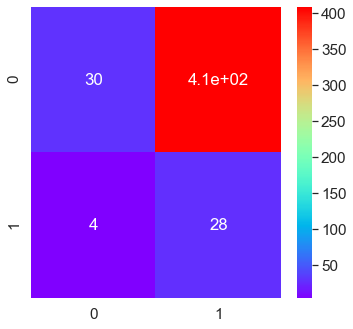

In [150]:
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

### Comparison of All Algorithms' Recall Rate

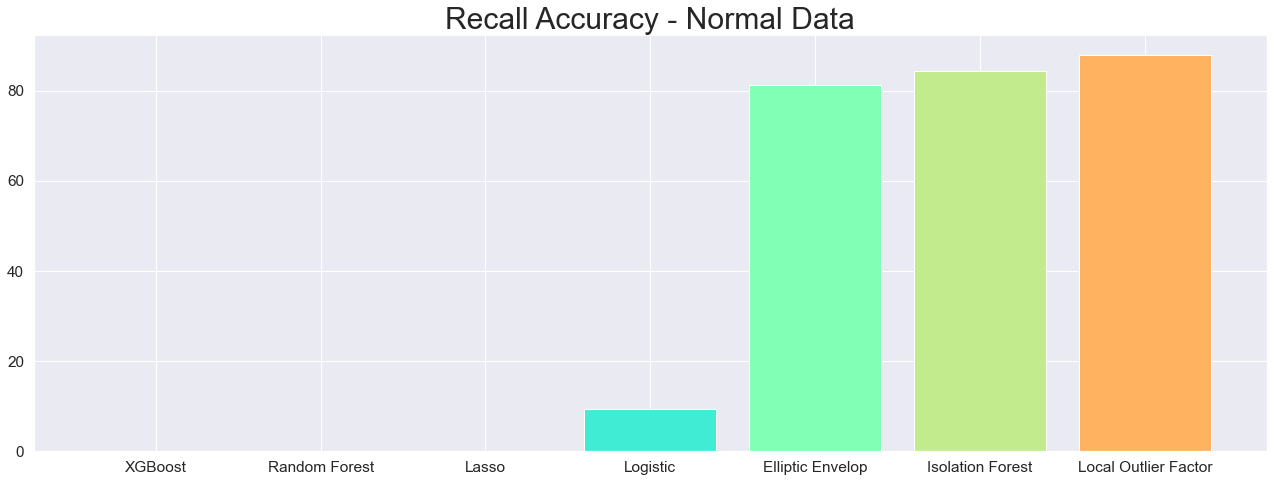

In [151]:
Recall = np.array([84.4, 87.9, 81.3,9.4,0,0,0])
label = np.array(['Isolation Forest', 'Local Outlier Factor', 'Elliptic Envelop',
                  'Logistic','XGBoost','Random Forest','Lasso'])
indices = np.argsort(Recall)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), Recall[indices], color = color)
plt.xticks(range(len(indices)), label[indices])
plt.title('Recall Accuracy - Normal Data', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

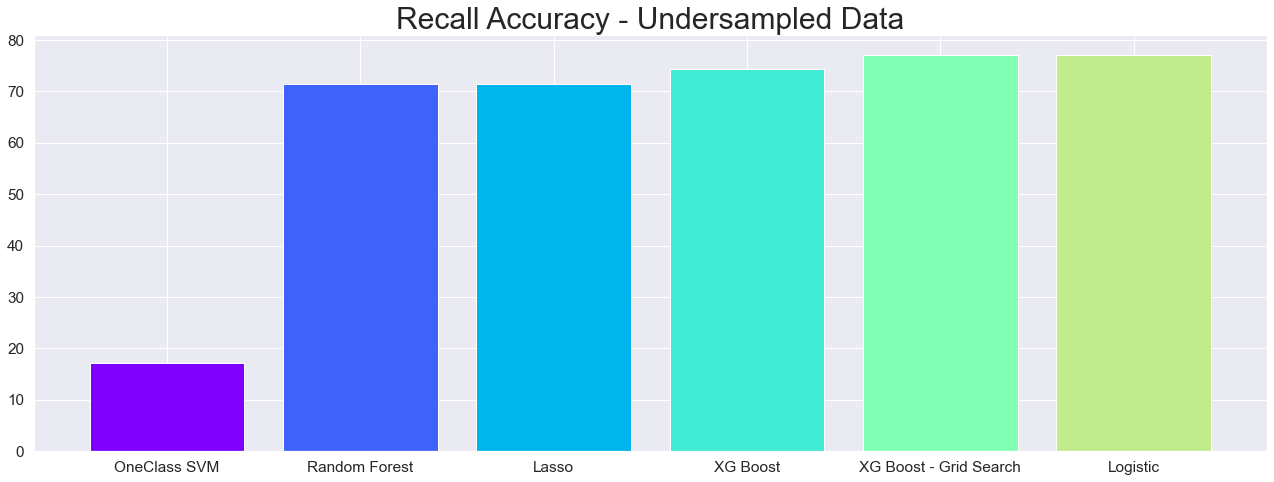

In [152]:
Recall = np.array([74.3,77.1,71.4,77.1,71.4,17.1])
label = np.array(['XG Boost','XG Boost - Grid Search','Random Forest','Logistic','Lasso','OneClass SVM'])
indices = np.argsort(Recall)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), Recall[indices], color = color)
plt.xticks(range(len(indices)), label[indices])
plt.title('Recall Accuracy - Undersampled Data', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

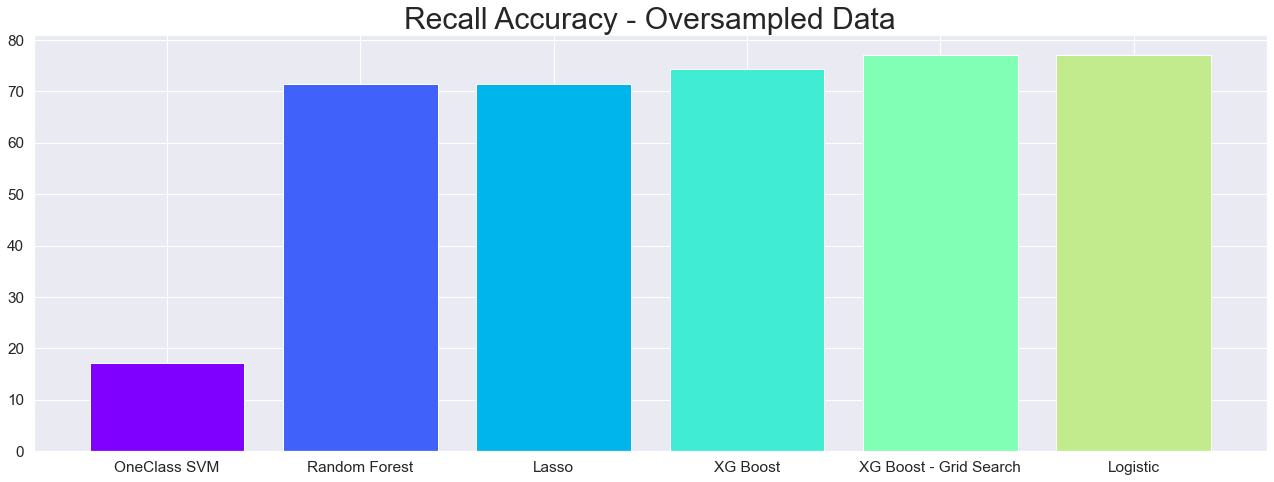

In [153]:
Recall = np.array([74.3,77.1,71.4,77.1,71.4,17.1])
label = np.array(['XG Boost','XG Boost - Grid Search','Random Forest','Logistic','Lasso','OneClass SVM'])
indices = np.argsort(Recall)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), Recall[indices], color = color)
plt.xticks(range(len(indices)), label[indices])
plt.title('Recall Accuracy - Oversampled Data', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

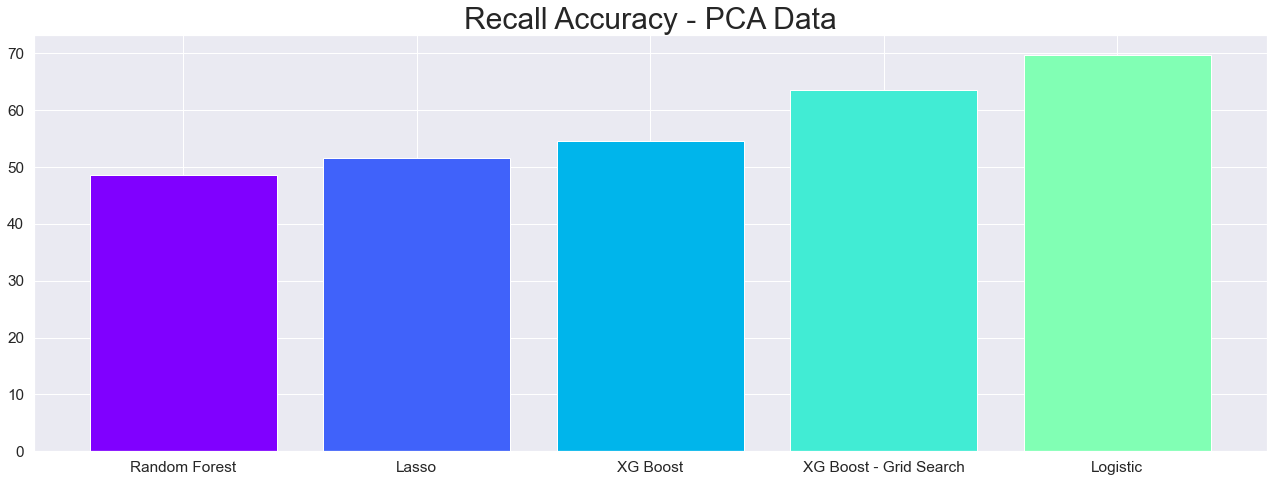

In [154]:
Recall = np.array([54.5,63.6,48.5,69.7,51.5])
label = np.array(['XG Boost','XG Boost - Grid Search','Random Forest','Logistic','Lasso'])
indices = np.argsort(Recall)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), Recall[indices], color = color)
plt.xticks(range(len(indices)), label[indices])
plt.title('Recall Accuracy - PCA Data', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\enaysep\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[00:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 8000x8000 with 0 Axes>

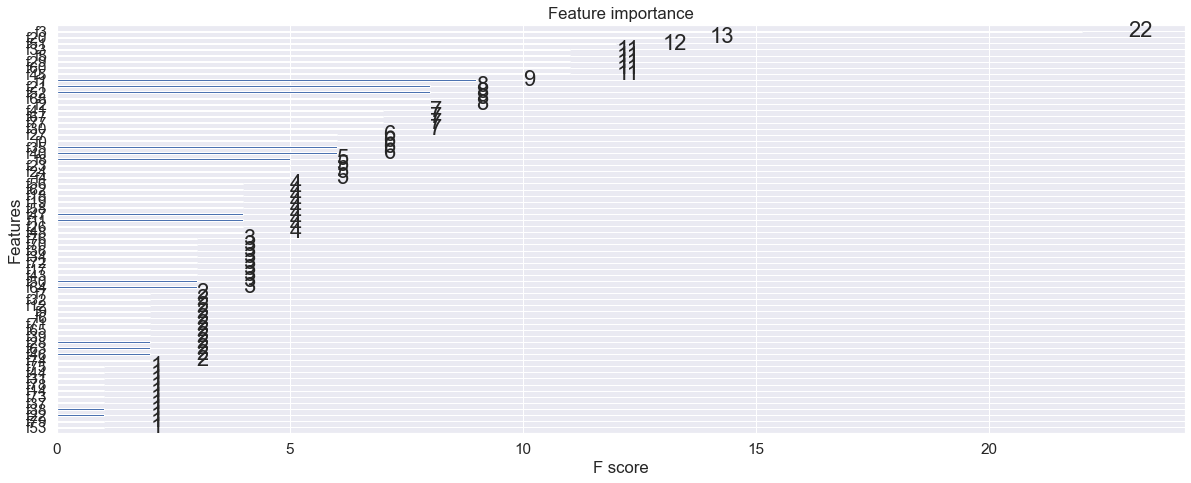

In [155]:
# plotting the feature importances

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
pyplot.rcParams.update({'font.size': 22})
from matplotlib.pyplot import figure
figure(num=None, figsize=(100, 100), dpi=80, facecolor='w', edgecolor='k')
# fit model no training data
model = XGBClassifier()
model.fit(x_train_us, y_train_us)
# plot feature importance
plot_importance(model)
pyplot.show()

In [156]:
featureImp = []
for feat, importance in zip(data.columns, model.feature_importances_):  
    temp = [feat, importance*100]
    featureImp.append(temp)

fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
print (fT_df.sort_values('Importance', ascending = False))

   Feature  Importance
53      89    5.149008
74     121    4.576894
24      40    4.389313
77     129    4.202582
48      84    4.081380
..     ...         ...
66     113    0.000000
55      91    0.000000
57      93    0.000000
61     103    0.000000
54      90    0.000000

[80 rows x 2 columns]


In [157]:
# Final model (which is Base model)

model = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, 
                           metric_params=None, contamination=outlier_fraction)

model.fit(x_train, y_train)
y_pred = model.fit_predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.88      0.07      0.13       439
           1       0.06      0.88      0.12        32

    accuracy                           0.12       471
   macro avg       0.47      0.47      0.12       471
weighted avg       0.83      0.12      0.13       471



<AxesSubplot:>

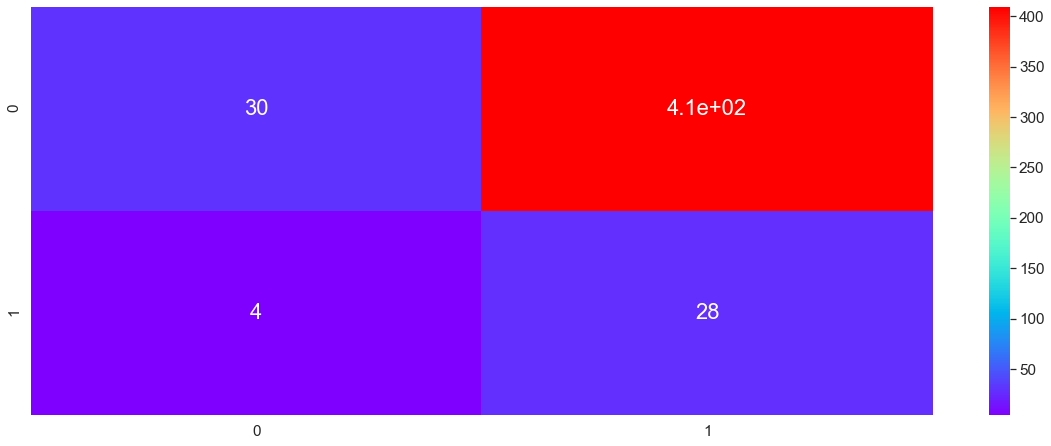

In [158]:
# printing the confusion matrix
#plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

In [159]:
# Import pickle Package

import pickle

In [160]:
# Save the Model to file in the current working directory

Pkl_Filename = "Pickle_LOF_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(LocalOutlierFactor, file)

In [161]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickle_LOF_Model = pickle.load(file)
    
Pickle_LOF_Model

sklearn.neighbors._lof.LocalOutlierFactor

### Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results

In [162]:
df_fp = pd.read_excel("Future_predictions.xlsx")

In [163]:
df_fp.shape

(18, 591)

In [164]:
fp = df_fp.drop(columns = ['Time'], axis = 1)

In [165]:
fp.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [166]:
fp.isnull().any().any()

True

In [167]:
fp.shape

(18, 590)

In [168]:
fp = fp.replace(np.NaN, 0)

# again, checking if there is any NULL values left
fp.isnull().any().any()

False

In [169]:
fp.isnull().apply(pd.value_counts) 

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
False,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18


In [170]:
#Drop columns with very low standard deviation thresholds 
threshold = 0.02
fp = fp.drop(fp.std()[fp.std() < threshold].index.values, axis=1)

In [171]:
fp.shape

(18, 359)

In [172]:
#Remove the highly collinear features from data
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [173]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
fp = remove_collinear_features(fp,0.70)

6 | 3 | 0.85
18 | 12 | 1.0
19 | 12 | 0.87
19 | 18 | 0.87
22 | 21 | 0.95
23 | 21 | 0.95
23 | 22 | 0.91
25 | 21 | 0.77
25 | 23 | 0.83
26 | 21 | 0.93
26 | 22 | 0.89
26 | 23 | 0.95
26 | 25 | 0.94
27 | 24 | 0.81
27 | 25 | 0.95
27 | 26 | 0.79
30 | 29 | 0.91
36 | 34 | 1.0
39 | 32 | 0.82
40 | 38 | 0.72
46 | 45 | 0.94
50 | 45 | 0.89
50 | 46 | 0.96
51 | 47 | 0.74
54 | 53 | 0.96
55 | 53 | 0.79
58 | 43 | 0.71
60 | 43 | 0.97
60 | 58 | 0.7
62 | 45 | 0.85
62 | 46 | 0.86
62 | 50 | 0.79
62 | 61 | 0.87
63 | 59 | 0.75
64 | 59 | 0.89
64 | 63 | 0.77
65 | 59 | 0.87
65 | 63 | 0.83
65 | 64 | 0.97
66 | 45 | 0.79
66 | 46 | 0.9
66 | 50 | 0.83
66 | 61 | 0.86
66 | 62 | 0.94
70 | 45 | 0.76
70 | 46 | 0.88
70 | 50 | 0.88
70 | 61 | 0.88
70 | 62 | 0.88
70 | 66 | 0.94
72 | 58 | 0.75
73 | 58 | 0.75
73 | 72 | 1.0
76 | 59 | 0.8
76 | 65 | 0.71
80 | 43 | 0.74
82 | 78 | 0.86
89 | 21 | 0.77
89 | 22 | 0.75
89 | 23 | 0.76
89 | 26 | 0.77
98 | 96 | 0.82
112 | 0 | 0.71
112 | 59 | 0.96
112 | 64 | 0.72
112 | 65 | 0.71
112 | 76 | 0.79

408 | 270 | 0.87
409 | 136 | 1.0
409 | 137 | 0.72
409 | 271 | 0.91
409 | 272 | 0.72
410 | 136 | 0.71
410 | 137 | 0.99
410 | 271 | 0.87
410 | 272 | 0.96
410 | 409 | 0.71
411 | 22 | 0.74
411 | 23 | 0.73
411 | 26 | 0.71
411 | 89 | 0.77
411 | 138 | 0.99
411 | 224 | 0.74
411 | 273 | 0.85
411 | 362 | 0.74
412 | 139 | 0.77
412 | 274 | 0.73
413 | 140 | 0.94
413 | 275 | 0.95
413 | 412 | 0.71
415 | 142 | 0.99
415 | 277 | 0.91
417 | 144 | 0.99
421 | 133 | 0.71
421 | 148 | 1.0
421 | 154 | 0.99
421 | 182 | 0.71
421 | 283 | 0.98
421 | 289 | 0.97
423 | 150 | 0.94
423 | 285 | 0.92
424 | 2 | 0.76
424 | 151 | 1.0
424 | 286 | 0.88
425 | 129 | 0.86
425 | 152 | 1.0
425 | 287 | 0.99
426 | 12 | 0.92
426 | 18 | 0.92
426 | 19 | 0.86
426 | 155 | 0.87
426 | 290 | 0.87
427 | 148 | 0.99
427 | 154 | 1.0
427 | 283 | 0.97
427 | 289 | 0.98
427 | 421 | 0.99
428 | 12 | 0.89
428 | 18 | 0.89
428 | 19 | 1.0
428 | 155 | 1.0
428 | 290 | 1.0
428 | 426 | 0.87
430 | 21 | 0.95
430 | 22 | 0.93
430 | 23 | 0.96
430 | 25 | 0.86
430 

552 | 549 | 0.99
553 | 121 | 0.8
553 | 123 | 0.72
553 | 125 | 0.89
553 | 133 | 0.75
553 | 549 | 0.73
553 | 550 | 1.0
553 | 551 | 0.99
554 | 121 | 0.8
554 | 123 | 0.71
554 | 125 | 0.89
554 | 133 | 0.71
554 | 550 | 0.99
554 | 551 | 1.0
554 | 553 | 0.99
555 | 549 | 0.93
555 | 550 | 0.77
555 | 551 | 0.74
555 | 552 | 0.91
555 | 553 | 0.77
555 | 554 | 0.74
556 | 121 | 0.8
556 | 123 | 0.71
556 | 125 | 0.89
556 | 133 | 0.74
556 | 549 | 0.72
556 | 550 | 1.0
556 | 551 | 0.99
556 | 553 | 1.0
556 | 554 | 0.99
556 | 555 | 0.76
557 | 121 | 0.8
557 | 123 | 0.71
557 | 125 | 0.89
557 | 133 | 0.72
557 | 550 | 0.99
557 | 551 | 1.0
557 | 553 | 0.99
557 | 554 | 1.0
557 | 555 | 0.74
557 | 556 | 0.99
558 | 38 | 0.78
558 | 40 | 0.7
558 | 345 | 0.76
558 | 346 | 0.71
560 | 115 | 0.73
560 | 558 | 0.74
560 | 559 | 0.96
561 | 559 | 0.97
561 | 560 | 0.86
563 | 562 | 0.96
564 | 562 | 0.81
564 | 563 | 0.74
565 | 525 | 0.74
565 | 563 | 0.71
566 | 562 | 0.81
566 | 563 | 0.73
566 | 564 | 0.99
567 | 525 | 0.75
567 | 565 

In [174]:
fp.head()

,0,1,2,3,4,8,12,14,15,16,...,493,499,511,526,539,546,549,559,562,573
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,1.5005,202.4396,7.9558,414.8710,10.0433,...,2.9570,0.0000,0.0000,0.5064,2.0570,1.0616,0.4234,0.4385,0.000,0.3157
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,1.4966,200.5470,10.1548,414.7347,9.2599,...,3.2029,0.0000,0.0000,0.8832,1.7910,1.3526,0.7193,0.1745,0.000,0.2653
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,1.4436,202.0179,9.5157,416.7075,9.3144,...,3.9238,0.0000,244.2748,0.6451,2.1538,0.7942,0.1832,0.3718,267.064,0.1882
3,2988.72,2479.90,2199.0333,909.7926,1.3204,1.4882,201.8482,9.6052,422.2894,9.6924,...,3.1817,0.0000,0.0000,0.7404,2.1565,1.1650,1.8804,0.7288,268.228,0.1738
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,1.5031,201.9424,10.5661,420.5925,10.3387,...,3.2712,293.1396,0.0000,2.2181,2.0579,1.4636,1.0388,0.2156,0.000,0.2224


In [175]:
fp.shape

(18, 107)

In [176]:
# Adding 'Pass/Fail' column
fp["Pass/Fail"] = df_red4["Pass/Fail"]

In [177]:
fp.shape

(18, 108)

In [178]:
fp.head()

,0,1,2,3,4,8,12,14,15,16,...,499,511,526,539,546,549,559,562,573,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,1.5005,202.4396,7.9558,414.8710,10.0433,...,0.0000,0.0000,0.5064,2.0570,1.0616,0.4234,0.4385,0.000,0.3157,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,1.4966,200.5470,10.1548,414.7347,9.2599,...,0.0000,0.0000,0.8832,1.7910,1.3526,0.7193,0.1745,0.000,0.2653,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,1.4436,202.0179,9.5157,416.7075,9.3144,...,0.0000,244.2748,0.6451,2.1538,0.7942,0.1832,0.3718,267.064,0.1882,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,1.4882,201.8482,9.6052,422.2894,9.6924,...,0.0000,0.0000,0.7404,2.1565,1.1650,1.8804,0.7288,268.228,0.1738,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,1.5031,201.9424,10.5661,420.5925,10.3387,...,293.1396,0.0000,2.2181,2.0579,1.4636,1.0388,0.2156,0.000,0.2224,-1


In [179]:
# separating the dependent and independent data

x = fp.iloc[:,:107]
y = fp.iloc[:,107]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (18, 107)
shape of y: (18,)


In [180]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (12, 107)
shape of x_test:  (6, 107)
shape of y_train:  (12,)
shape of y_test:  (6,)


In [181]:
# standardization

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Local Outlier Factor Technique - best chosen model 

In [182]:
# Local Outlier Factor Technique 
# Final model (perform the prediction using the best chosen model)

model = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, 
                           metric_params=None, contamination=outlier_fraction)

model.fit(x_train, y_train)
y_pred = model.fit_predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.25      0.40         4
           1       0.40      1.00      0.57         2

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6



C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:279: UserWarning: n_neighbors (20) is greater than the total number of samples (12). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:279: UserWarning: n_neighbors (20) is greater than the total number of samples (6). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


<AxesSubplot:>

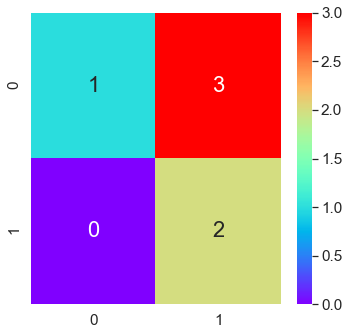

In [183]:
# printing the confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

# 6. Conclusion and improvisation:

   - We have tried multiple models Logistic Regression, Random Forest, XG Boost (with and without Grid Search),OneClassSVM, Elliptic Envelop, Isolation Forest and Local Outlier Factor for the imbalanced classes
   - Across methods OneClassSVM performed the worst while Local Outlier Factor performed the best in terms of recall accuracy
   - We saw that for imbalanced classes accuracy and recall are invertially proportional to each other. Better recall models have lower accuracy and vice versa.
   - We have tried two sampling techniques -first one using SMOTE (oversampling) and second one using random based method (undersampling). Oversampling gave better results than undersampling in terms of accuracy. Recall score was similar for both undersampling and oversampling.
   - We did Z score scaling on both the datasets and took PCA with n_components as 80 (90% variance coverage). However PCA did not improve either accuracy or recall probably as we were loosing information due to dropping dimensions.
   - We tried K-fold cross validation within XG Boost itself with bext value as 2 for all the models.
   - Using feature importance, we found the important features. The best recall value at 88% was for Local Outlier Factor algorithm, the best part was no sampling was required as the algorithm took care of sampling as well as outliers classifier on the failure observations.

                                                    End